In [1]:
import numpy as np
from matplotlib import pyplot as plt, __version__ as pltver
from sys import path, version
from astropy.table import Table
from astropy import __version__ as apver
path.append('../code/')

from diagnostics import *

%matplotlib inline

In [2]:
print(apver,h5.__version__,pltver,np.__version__,version)

3.1.2 2.8.0 3.0.0 1.15.2 3.5.6 |Anaconda custom (64-bit)| (default, Aug 26 2018, 16:30:03) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]


# This is an example notebook of how to use the functions in code/diagnostics.py, which can be used to reproduce the plots in Dorn-Wallenstein & Levesque (2019, submitted to ApJ). The functions in diagnostics.py have been updated to include calculations with the Geneva rotating and non-rotating tracks.

# Author: Trevor Dorn-Wallenstein

First, let's plot up the predicted number of various stellar species at various metallicities vs. time. These are raw outputs from the Binary Population and Stellar Synthesis code by J. J. Eldridge, v.2.2.1, plus the most recent Geneva stellar evolution models.

This utilizes get_arrs, which accesses a hdf5 file with the data in it. It's quite flexible! For both Geneva and BPASS tracks, you can specify a subtype, metallicity, and luminosity cutoff, in addition to a star-formation history (see documentation).

/Users/carina/anaconda/lib/python3.5/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


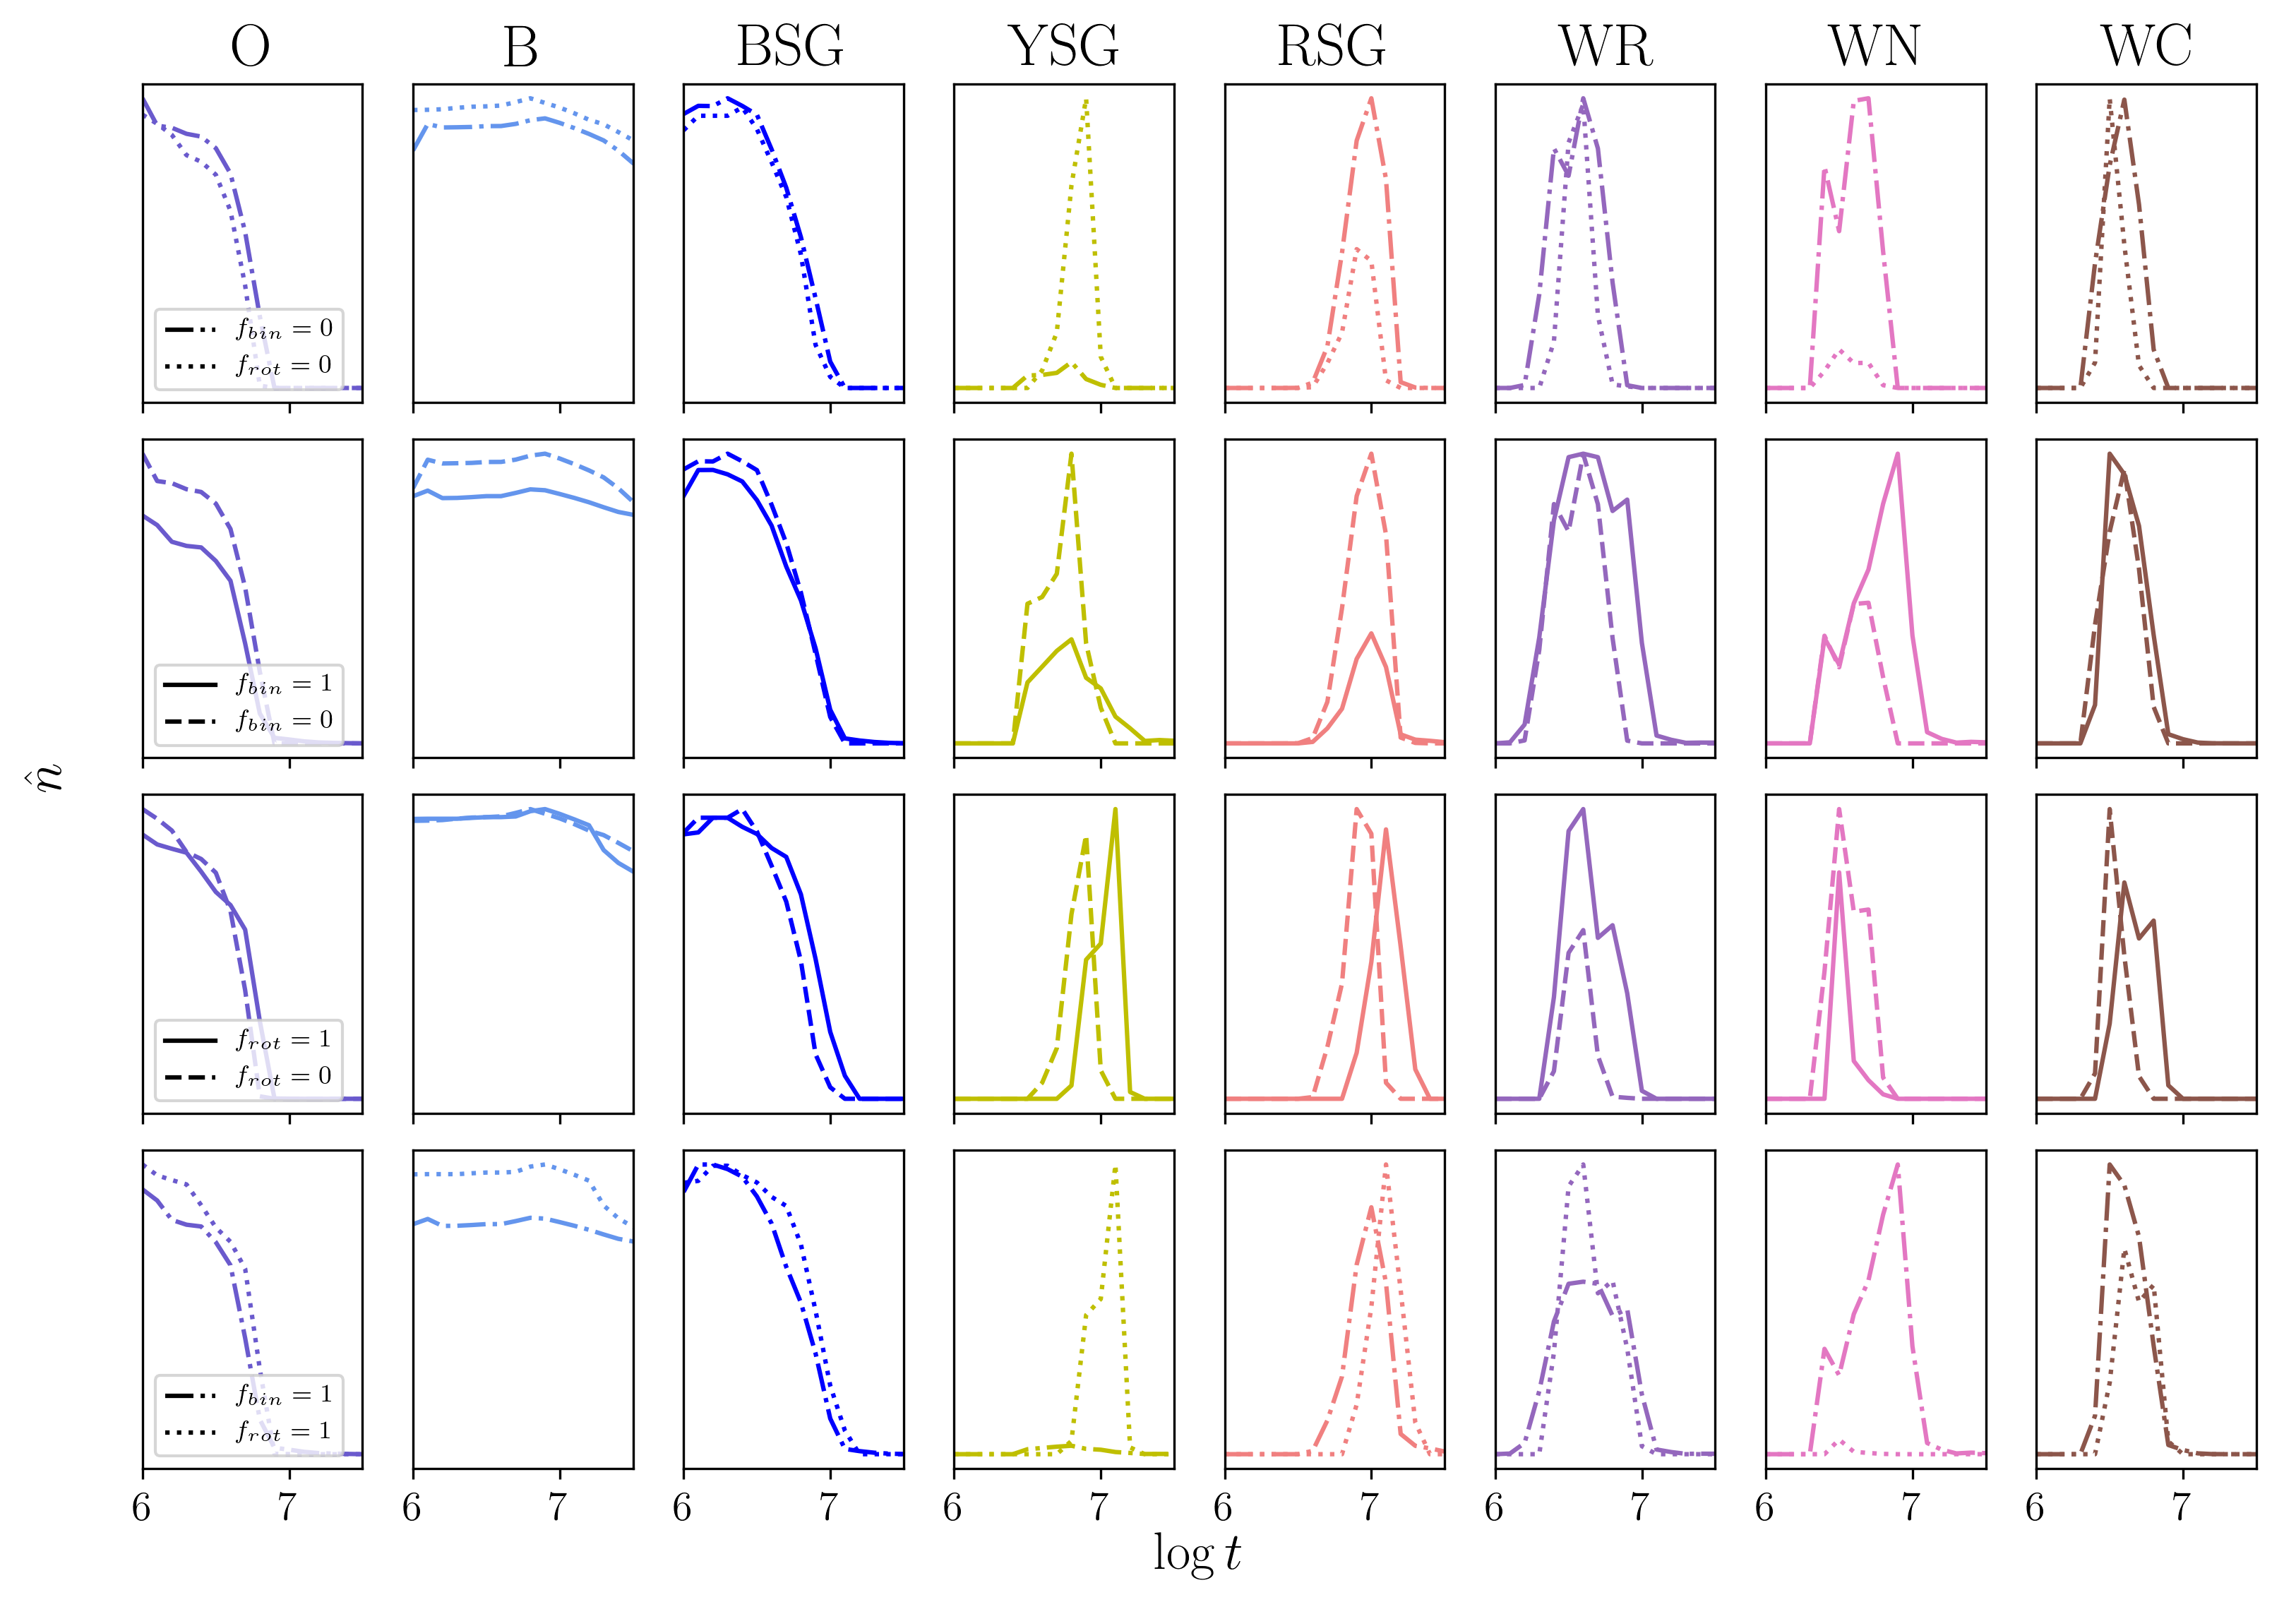

In [3]:
fig, axes = plt.subplots(4,8,figsize=(11,8),dpi=300,sharex=True)

types = ['O','B','BSG','YSG','RSG','WR','WN','WC']
Lcut = [0.0,0.0,4.9,4.9,4.9,4.9,4.9,4.9]
Cs = ['slateblue','cornflowerblue','b','y','lightcoral','C4','C6','C5']
bpass_gen_linestyles = ['-.',':']
b_s_linestyles = ['-','--']

models = ['BPASS','Geneva']

for i,model in enumerate(models):
    for j,t in enumerate(types):
        ax = axes[i+1,j]
        barr,sarr = get_arrs(t,'z014',Lcut=Lcut[j],models=model)
        s = sarr
        b = barr
        ax.plot(logages,b,c=Cs[j],ls=b_s_linestyles[0])
        ax.plot(logages,s,c=Cs[j],ls=b_s_linestyles[1])
        axes[0,j].plot(logages,s,c=Cs[j],ls=bpass_gen_linestyles[i])
        axes[3,j].plot(logages,b,c=Cs[j],ls=bpass_gen_linestyles[i])

for j,t in enumerate(types):
    axes[0,j].set(title=t)
axes[0,0].set(xlim=(6,7.5))

#Axis labels
labax = fig.add_subplot(111)
labax.spines['top'].set_color('none')
labax.spines['bottom'].set_color('none')
labax.spines['left'].set_color('none')
labax.spines['right'].set_color('none')
labax.tick_params(labelcolor='w', top='off', bottom='off', left='off', right='off')
labax.set_xlabel(r'$\log{t}$',fontsize=18,family='serif')
labax.set_ylabel(r'$\hat{{n}}$',fontsize=18,family='serif')
labax.set_zorder(-1)

#Legends and annotations
legend_dict = {0:[r'$f_{bin}=0$',r'$f_{rot}=0$'],1:[r'$f_{bin}=1$',r'$f_{bin}=0$'],2:[r'$f_{rot}=1$',r'$f_{rot}=0$'],3:[r'$f_{bin}=1$',r'$f_{rot}=1$']}
ls_dict = {0:bpass_gen_linestyles,1:b_s_linestyles,2:b_s_linestyles,3:bpass_gen_linestyles}

for i in range(4):
    axes[i,0].legend(handles=[mlines.Line2D([], [], color='k',ls=l,label=p) for p,l in zip(legend_dict[i],ls_dict[i])],loc=3, prop={'size': 8.5})

for ax in axes.flatten():
    ax.xaxis.label.set_size(20)
    ax.yaxis.label.set_size(20)
    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(14)
    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(14)
    ax.title.set_fontsize(20)
    
for ax in axes.flatten():
    ax.set_yticks([])

fig.tight_layout()
    
plt.savefig('binary_vs_rotation_counts.pdf')

Number count ratios can be used as diagnostics of a stellar population. We want to explore the effects of binaries and rotation on these diagnostics for both simple and complex stellar populations, using get_ratio_at_parameter.

../code/diagnostics.py:168: RuntimeWarning: divide by zero encountered in true_divide
  return np.divide(subtype1_t,subtype2_t)
../code/diagnostics.py:168: RuntimeWarning: invalid value encountered in true_divide
  return np.divide(subtype1_t,subtype2_t)
/Users/carina/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:4: RuntimeWarning: divide by zero encountered in log10
/Users/carina/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:5: RuntimeWarning: divide by zero encountered in log10
/Users/carina/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:7: RuntimeWarning: divide by zero encountered in log10
/Users/carina/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:8: RuntimeWarning: divide by zero encountered in log10
/Users/carina/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:9: RuntimeWarning: divide by zero encountered in log10
/Users/carina/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:10: RuntimeWarning: divide by ze

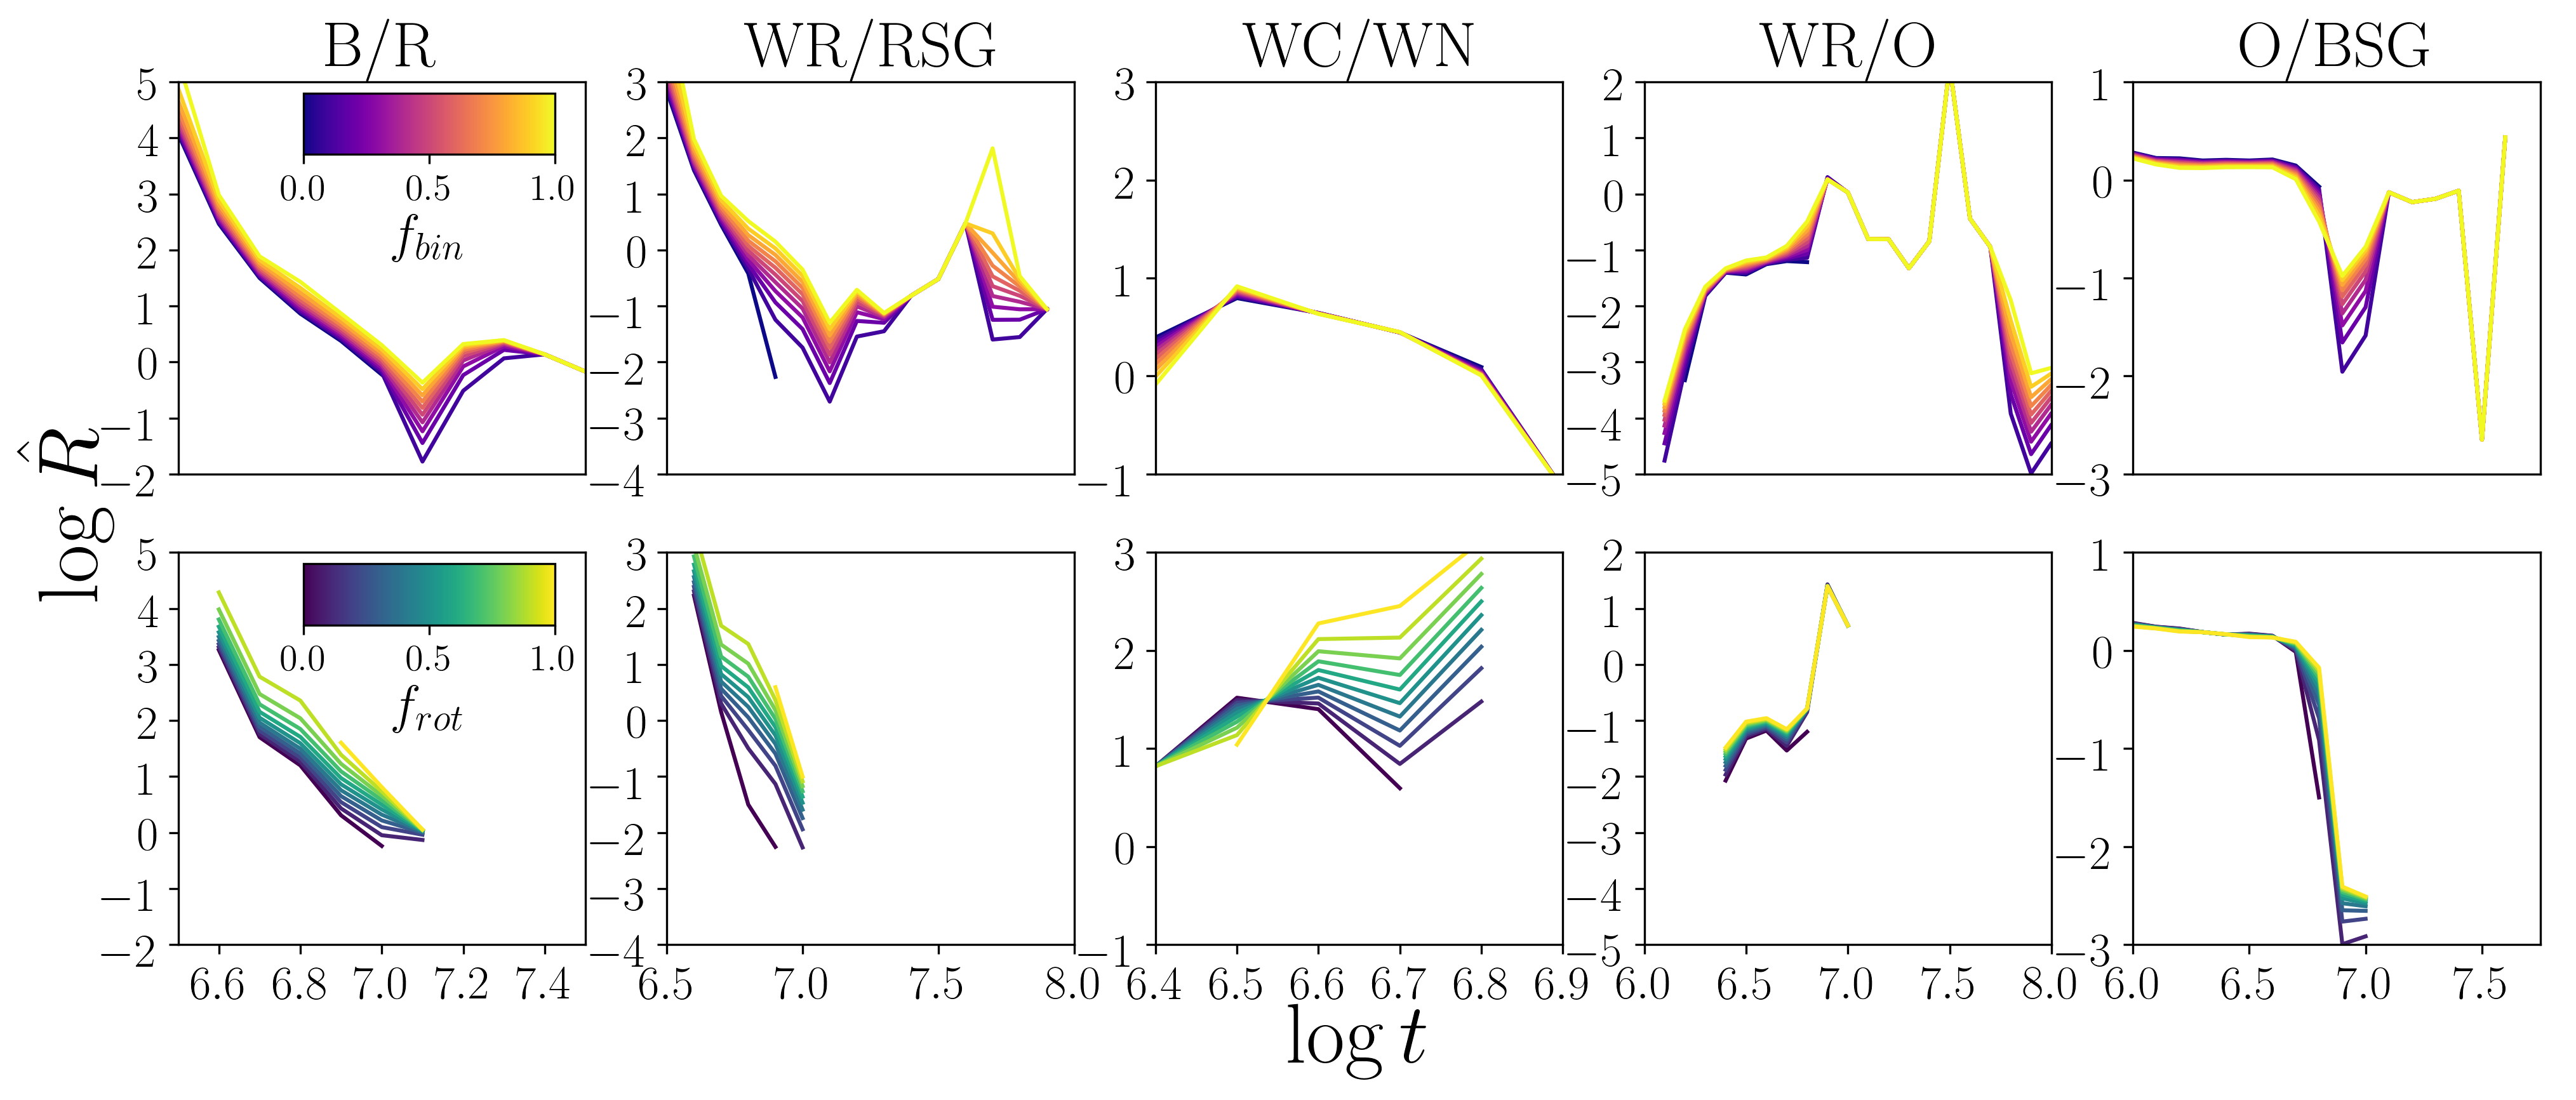

In [4]:
fig, axes = plt.subplots(2,5,figsize=(16,6),dpi=300)

for f in f_bins:
    axes[0,0].plot(logages,np.log10([get_ratio_at_parameter('BSG/RSG','z014',t,f_bin=f,Lcut=4.9) for t in logages]),c=bcmap(f),path_effects=[pe.Stroke(linewidth=1, foreground='0.75'), pe.Normal()])
    axes[0,1].plot(logages,np.log10([get_ratio_at_parameter('WR/RSG','z014',t,f_bin=f,Lcut=4.9) for t in logages]),c=bcmap(f),path_effects=[pe.Stroke(linewidth=1, foreground='0.75'), pe.Normal()])
    axes[0,2].plot(logages,np.log10([get_ratio_at_parameter('WC/WN','z014',t,f_bin=f,Lcut=4.9) for t in logages]),c=bcmap(f),path_effects=[pe.Stroke(linewidth=1, foreground='0.75'), pe.Normal()])
    axes[0,3].plot(logages,np.log10([get_ratio_at_parameter('WR/O','z014',t,f_bin=f,Lcut1=4.9) for t in logages]),c=bcmap(f),path_effects=[pe.Stroke(linewidth=1, foreground='0.75'), pe.Normal()])
    axes[0,4].plot(logages,np.log10([get_ratio_at_parameter('O/BSG','z014',t,f_bin=f,Lcut2=4.9) for t in logages]),c=bcmap(f),path_effects=[pe.Stroke(linewidth=1, foreground='0.75'), pe.Normal()])
    axes[1,0].plot(logages,np.log10([get_ratio_at_parameter('BSG/RSG','z014',t,f_rot=f,Lcut=4.9,) for t in logages]),c=rcmap(f),path_effects=[pe.Stroke(linewidth=1, foreground='0.75'), pe.Normal()])
    axes[1,1].plot(logages,np.log10([get_ratio_at_parameter('WR/RSG','z014',t,f_rot=f,Lcut=4.9) for t in logages]),c=rcmap(f),path_effects=[pe.Stroke(linewidth=1, foreground='0.75'), pe.Normal()])
    axes[1,2].plot(logages,np.log10([get_ratio_at_parameter('WC/WN','z014',t,f_rot=f,Lcut=4.9) for t in logages]),c=rcmap(f),path_effects=[pe.Stroke(linewidth=1, foreground='0.75'), pe.Normal()])
    axes[1,3].plot(logages,np.log10([get_ratio_at_parameter('WR/O','z014',t,f_rot=f,Lcut1=4.9) for t in logages]),c=rcmap(f),path_effects=[pe.Stroke(linewidth=1, foreground='0.75'), pe.Normal()])
    axes[1,4].plot(logages,np.log10([get_ratio_at_parameter('O/BSG','z014',t,f_rot=f,Lcut2=4.9) for t in logages]),c=rcmap(f),path_effects=[pe.Stroke(linewidth=1, foreground='0.75'), pe.Normal()])
        


for j,t in enumerate(['B/R','WR/RSG','WC/WN','WR/O','O/BSG']):
    axes[0,j].set_title(t,fontsize=24)  

for i in range(2):
    axes[i,0].set(xlim=(6.5,7.5),ylim=(-2,5))
    axes[i,1].set(xlim=(6.5,8),ylim=(-4,3))
    axes[i,2].set(xlim=(6.4,6.9),ylim=(-1,3))
    axes[i,3].set(xlim=(6,8),ylim=(-5,2))
    axes[i,4].set(xlim=(6,7.75),ylim=(-3,1))
    
for i in range(5):
    axes[0,i].set_xticks([])

#Axis labels
labax = fig.add_subplot(111)
labax.spines['top'].set_color('none')
labax.spines['bottom'].set_color('none')
labax.spines['left'].set_color('none')
labax.spines['right'].set_color('none')
labax.tick_params(labelcolor='w', top='off', bottom='off', left='off', right='off')
labax.set_xlabel(r'$\log{t}$',fontsize=32,family='serif')
labax.set_ylabel(r'$\log\hat{R}$',fontsize=32,family='serif')
labax.set_zorder(-1)

for ax in axes.flatten():
    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(18)
    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(18)


cbax = fig.add_subplot(9,8,1)
cbax_pos = cbax.get_position()
ax0_pos = axes[0,0].get_position()
cbax.set_position([ax0_pos.x0+ax0_pos.width-0.01-cbax_pos.width,ax0_pos.y0+ax0_pos.height-0.01-0.75*cbax_pos.height, cbax_pos.width, 0.75*cbax_pos.height])
norm = colors.Normalize(vmin=0, vmax=1)
cb1 = cbar.ColorbarBase(cbax, cmap=bcmap,
                                norm=norm,
                                orientation='horizontal')
cb1.set_label(r'$f_{bin}$',fontsize=20)
cb1.set_ticks([0,0.5,1])
cb1.ax.tick_params(labelsize=14)


cbax2 = fig.add_subplot(9,8,37)
cbax2_pos = cbax2.get_position()
ax1_pos = axes[1,0].get_position()
cbax2.set_position([ax1_pos.x0+ax1_pos.width-0.01-cbax2_pos.width,ax1_pos.y0+ax1_pos.height-0.01-0.75*cbax2_pos.height, cbax2_pos.width, 0.75*cbax2_pos.height])
cb2 = cbar.ColorbarBase(cbax2, cmap=rcmap,
                                norm=norm,
                                orientation='horizontal')
cb2.set_label(r'$f_{rot}$',fontsize=20)
cb2.set_ticks([0,0.5,1])
cb2.ax.tick_params(labelsize=14)
        
plt.savefig('binary_rotation_ratios.pdf')

Clearly different ratios are sensitive to binary interactions/rotation at different ages. 

We can compare some of these predictions with data from an actual cluster, Westerlund 1. Here's the data, from Crowther et al. (2006, MNRAS) and Clark et al. (2005, A&A). Using single-star diagnostics, Westerlund 1's age is $\approx4.5$ Myr. Here we adopt $Z=Z_\odot$.

In [5]:
#Westerlund 1 data from Crowther+06 MNRAS, Clark+05 A&A
WC_W = 8.0
WN_W = 16.0
WR_W = WC_W + WN_W
O_W = 22.0
RSG_W = 3.0
BSG_W = 29.0

Now, these are all Poisson variables, so it's pretty important to calculate the error on the various ratios correctly. We've implemented a Monte Carlo method of deriving the posterior distribution for the underlying ratio. It's a little slow, but this kind of analysis is incredibly important to derive accurate confidence intervals. Here's an example of using it. Note that we return $\hat{n}_{RSG}$ which is a nuisance variable that we marginalize over, as well as the $\mathrm{\tt emcee}$ sampler object by default:

In [6]:
WRSG_W,lambda_RSG,WRRSGsampler = MCMC_ratio_errors(WR_W,RSG_W)

#All O stars are BSGs. So, we instead estimate O/(BSG-O)...
OBSGmO_W,lambda_OBSGmO,sampler = MCMC_ratio_errors(O_W,BSG_W-O_W)
#Then transform all the samples of O/(BSG-O) into O/BSG...
OBSG_samples = 1.0 / ((1.0/sampler.flatchain[:,0]) + 1)
v = np.percentile(OBSG_samples,[50 - 68.0/2, 50, 50 + 68.0/2])
OBSG_W = (v[1], v[2]-v[1], v[1]-v[0])

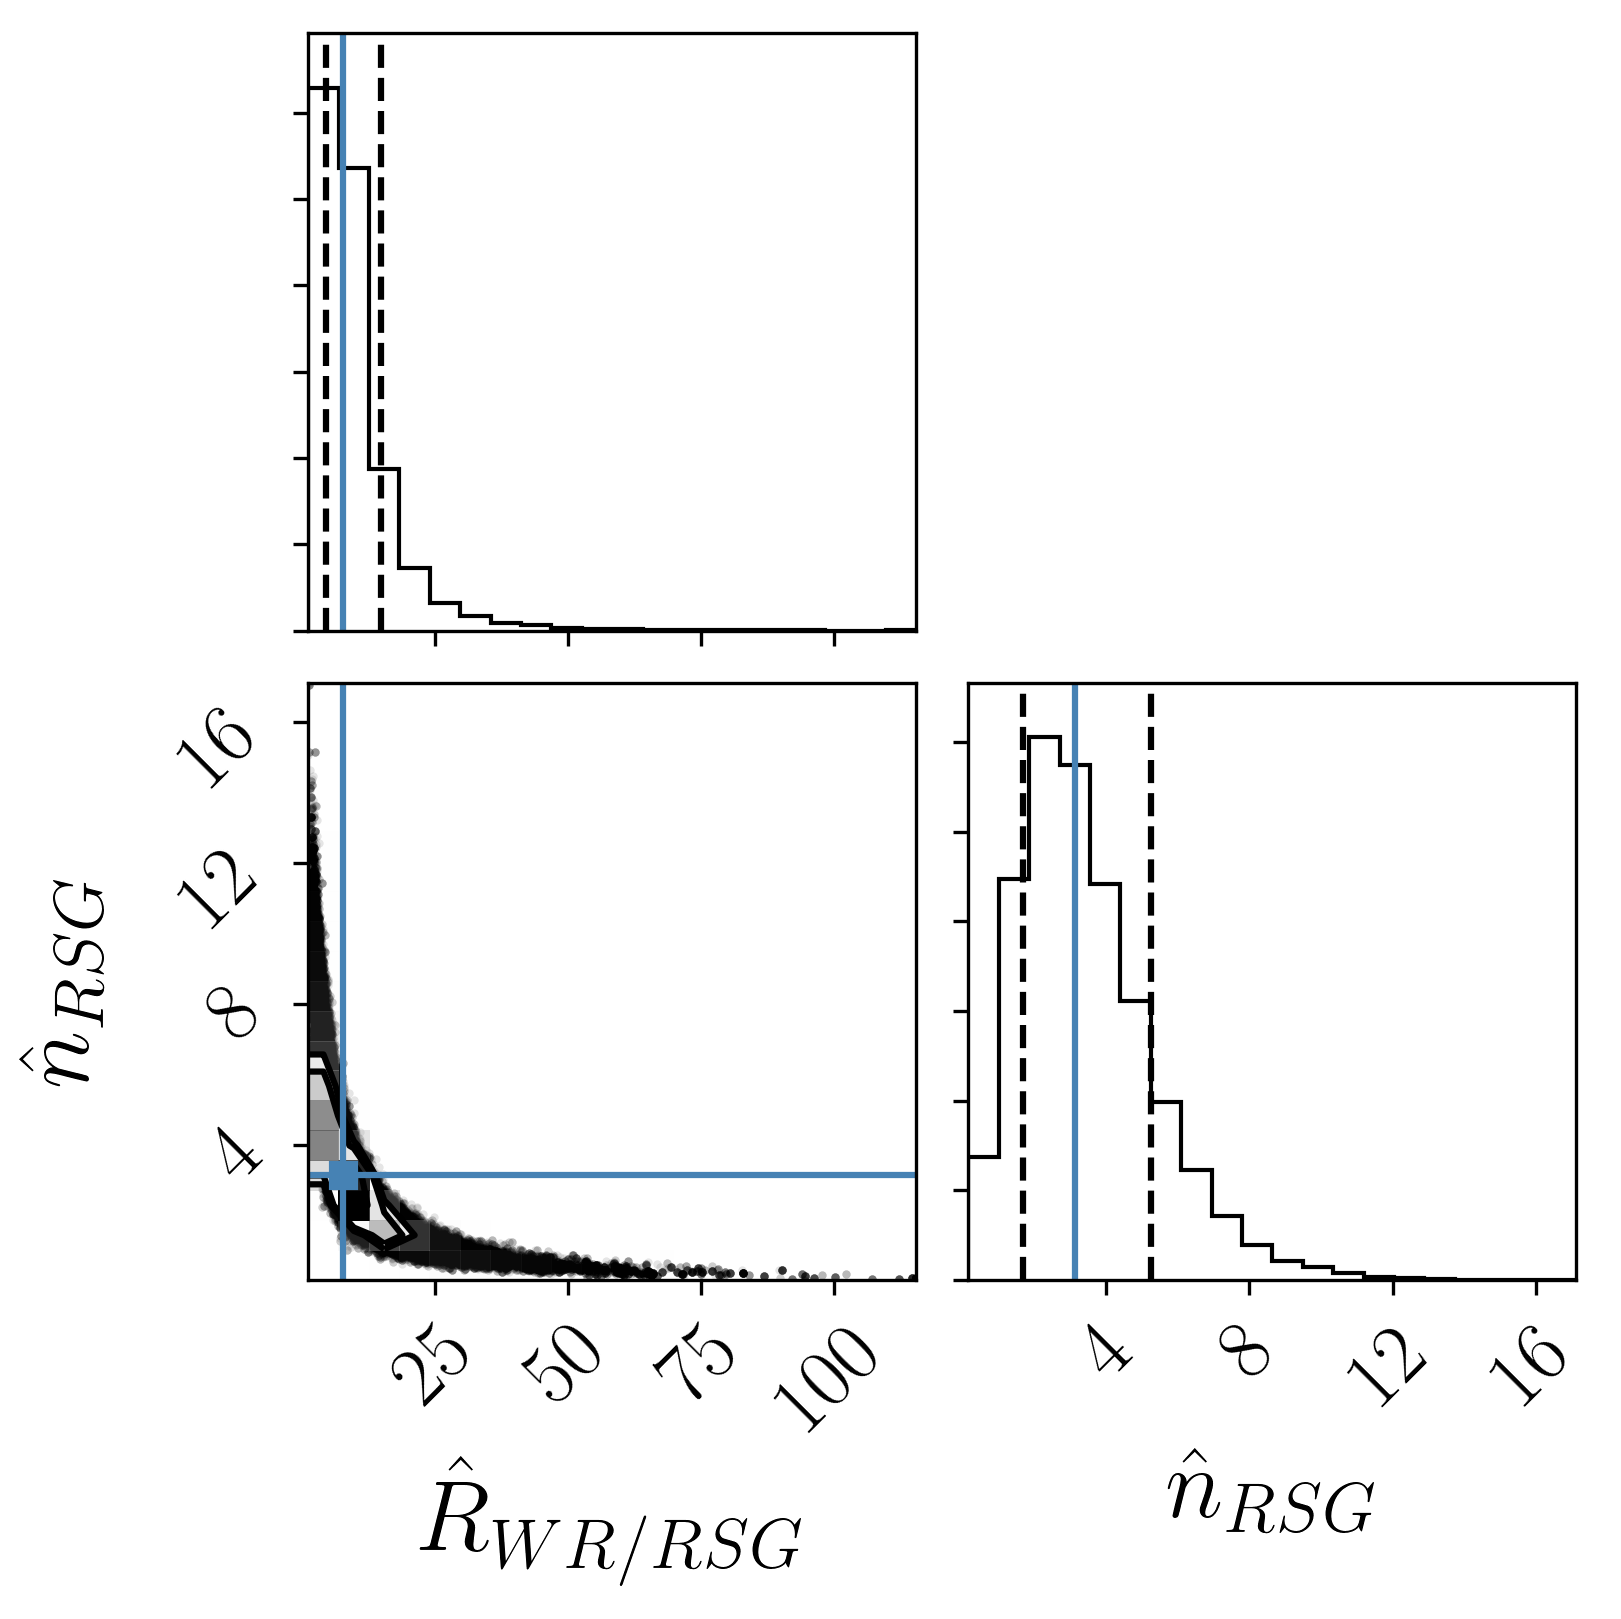

In [7]:
import corner

fig = corner.corner(WRRSGsampler.flatchain,labels=[r'$\hat{R}_{WR/RSG}$',r'$\hat{n}_{RSG}$'],
                    truths=[WRSG_W[0],lambda_RSG[0]],quantiles=[.16,.84])

fig.dpi=300

for ax in fig.axes:
    ax.xaxis.label.set_size(24)
    ax.yaxis.label.set_size(24)
    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(20)
    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(20)
    
fig.tight_layout()

plt.savefig('Wd1_WRRSG_corner.pdf')

In [8]:
for r,lab in zip([OBSG_W,WRSG_W],['O/BSG','WR/RSG']):
    print('${0} = {1:.3f} ^{{+{2:.3f}}}_{{-{3:.3f}}}$'.format(lab,r[0],r[1],r[2]))

$O/BSG = 0.755 ^{+0.073}_{-0.084}$
$WR/RSG = 7.693 ^{+7.042}_{-3.271}$


../code/diagnostics.py:168: RuntimeWarning: divide by zero encountered in true_divide
  return np.divide(subtype1_t,subtype2_t)


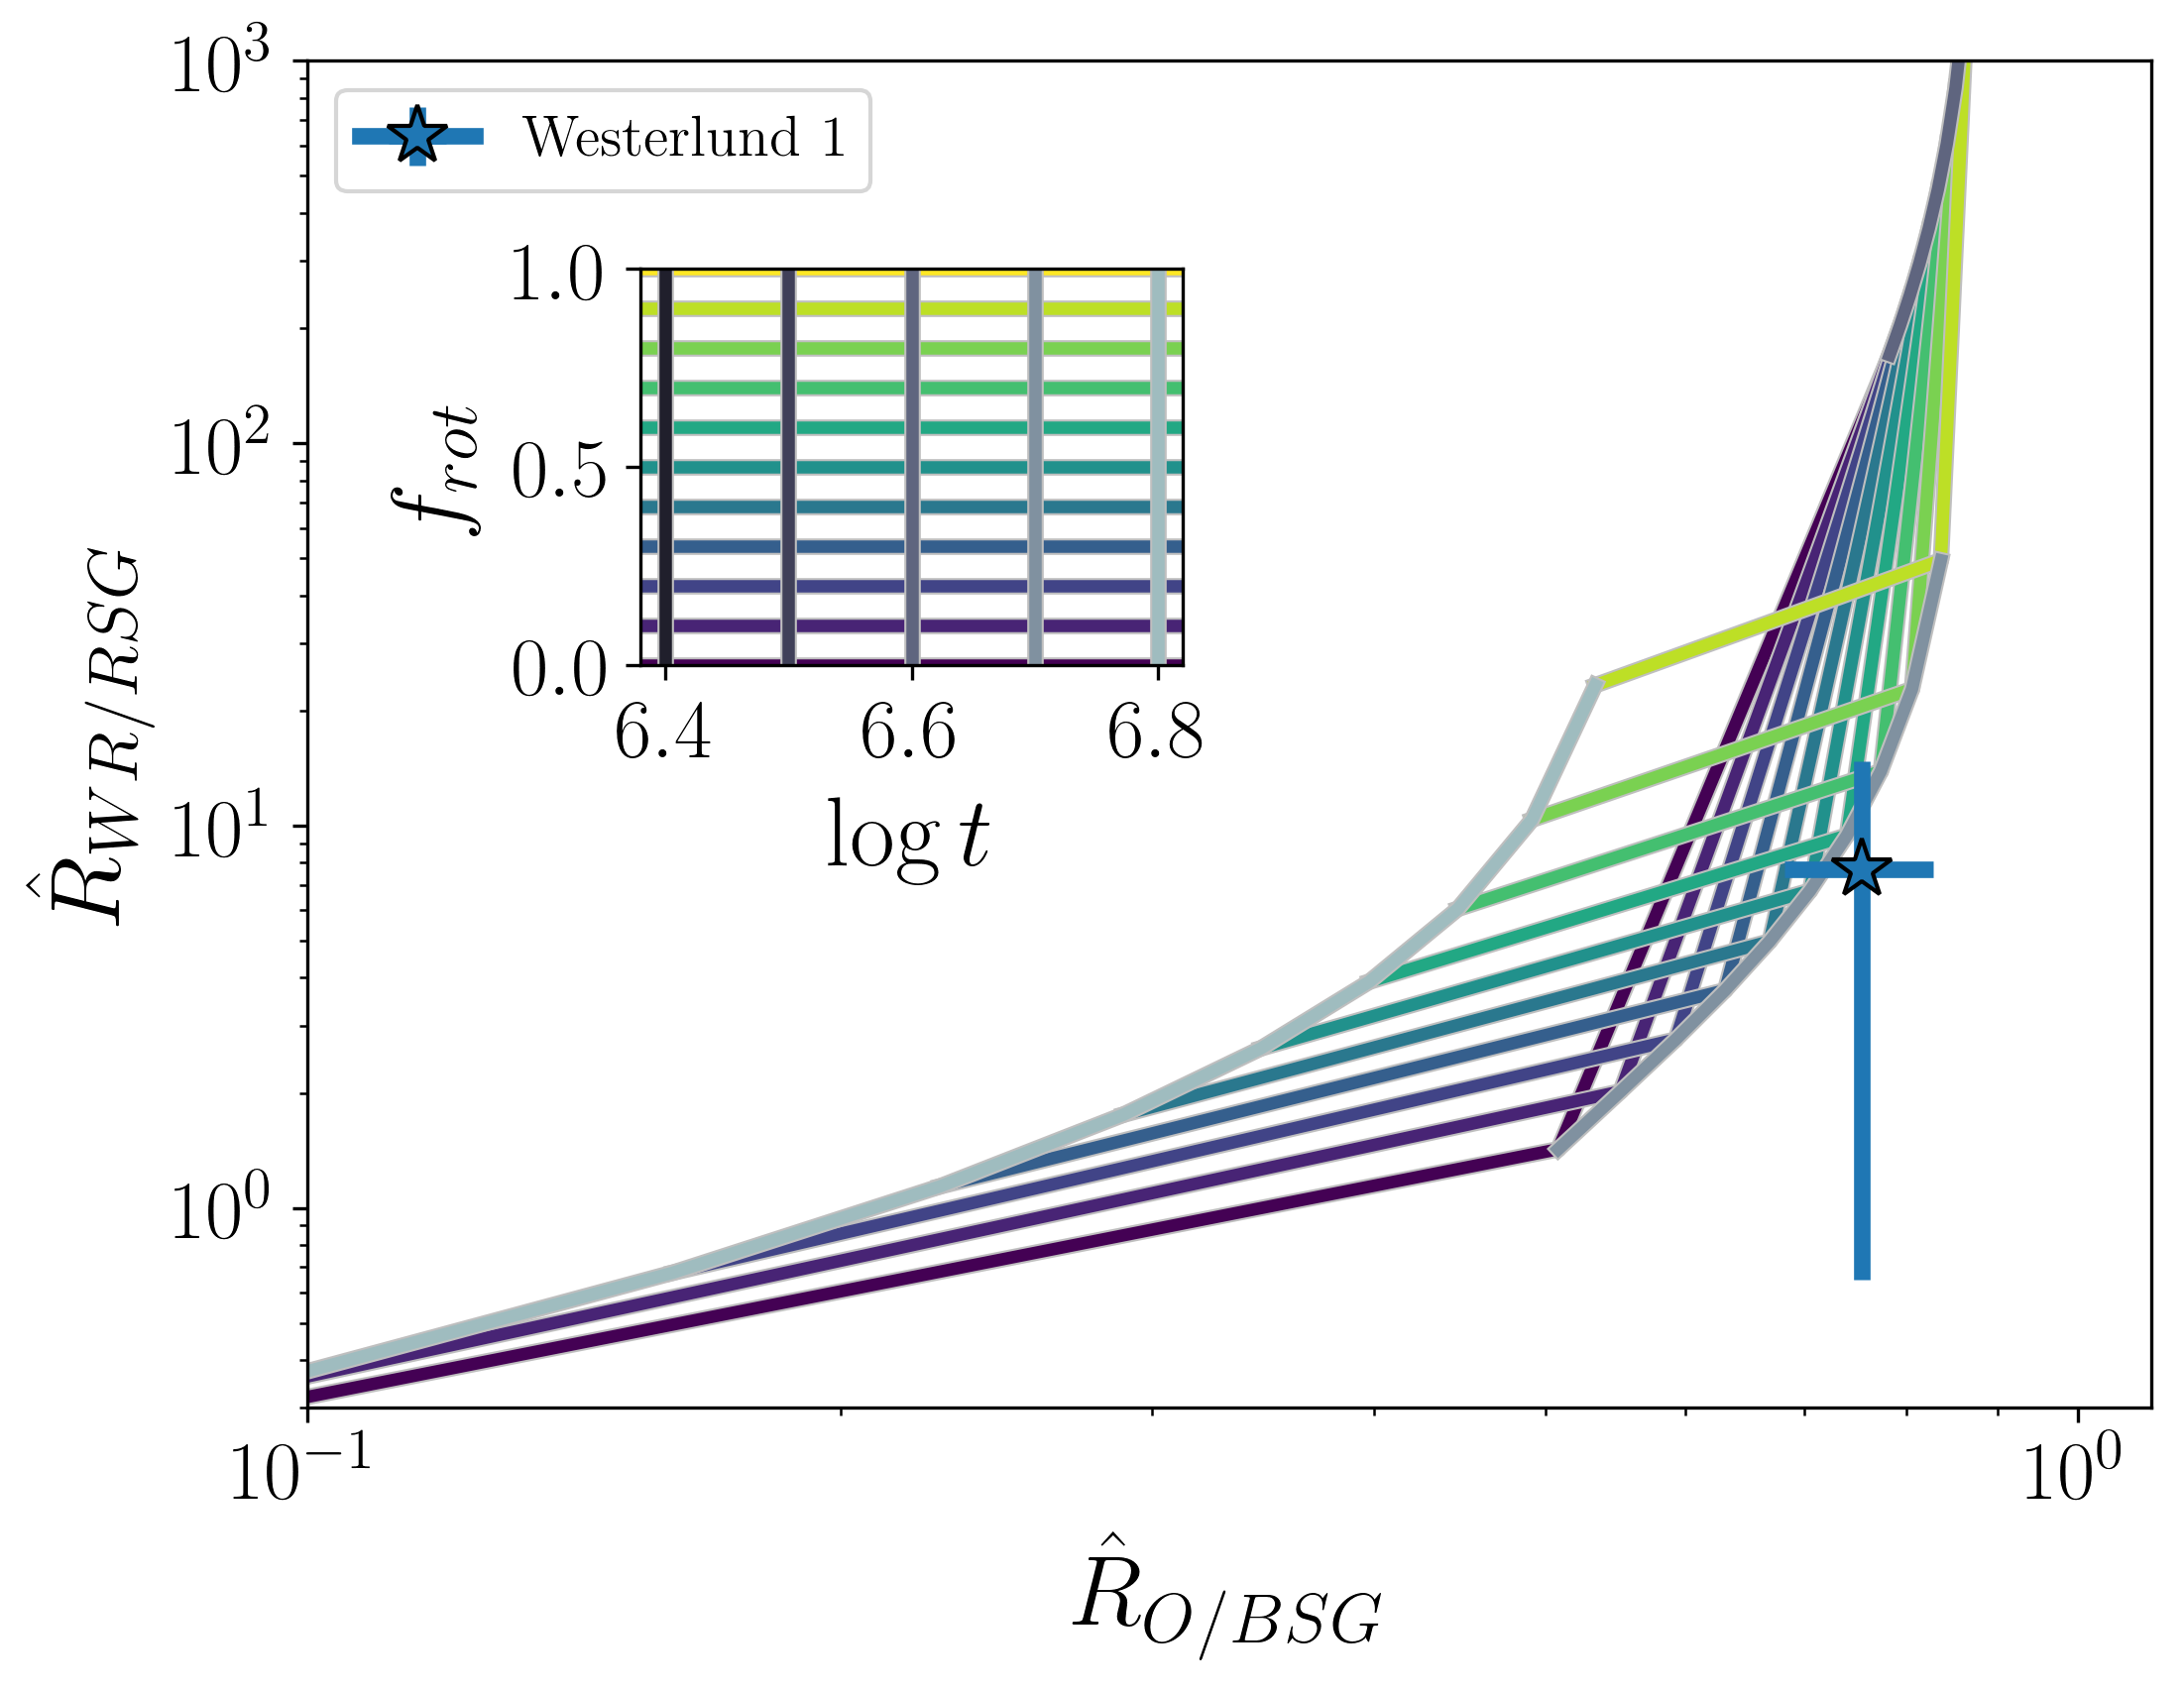

In [9]:
fig, ax = plot_ratios(ratio1='O/BSG',ratio2='WR/RSG',par3='z',par3val='z014',models='Geneva',constraint_dict={'logtime':(6.4,6.9),'Lcuts':(4.9,4.9,5.1,4.9)})
fig.set_figheight(6)
fig.set_figwidth(8)
fig.dpi = 300

ax[0].errorbar(OBSG_W[0],WRSG_W[0],yerr=[np.array([WRSG_W[1],WRSG_W[2]])],xerr=[np.array([OBSG_W[1],OBSG_W[2]])],label='Westerlund 1',zorder=50,lw=4,marker='*',mec='k',ms=15)
ax[0].legend(loc=2,prop={'size':14})
ax[0].set(title='',ylim=(0.3,1e3),xlim=(1e-1,1.1))
ax[0].change_geometry(1,1,1)
ax[1].change_geometry(3,3,4)
ax1_pos = ax[1].get_position()
ax[1].set_position([ax1_pos.x0+0.14,ax1_pos.y0+0.15, ax1_pos.width, ax1_pos.height])

ax[0].xaxis.label.set_size(24)
ax[0].yaxis.label.set_size(24)
ax[1].xaxis.label.set_size(24)
ax[1].yaxis.label.set_size(24)
ax[1].set_yticks([0,0.5,1])
for tick in ax[0].xaxis.get_major_ticks():
    tick.label.set_fontsize(20)
for tick in ax[0].yaxis.get_major_ticks():
    tick.label.set_fontsize(20)
for tick in ax[1].xaxis.get_major_ticks():
    tick.label.set_fontsize(20)
for tick in ax[1].yaxis.get_major_ticks():
    tick.label.set_fontsize(20)
    
plt.savefig('wd1_rotation.pdf')

../code/diagnostics.py:168: RuntimeWarning: divide by zero encountered in true_divide
  return np.divide(subtype1_t,subtype2_t)


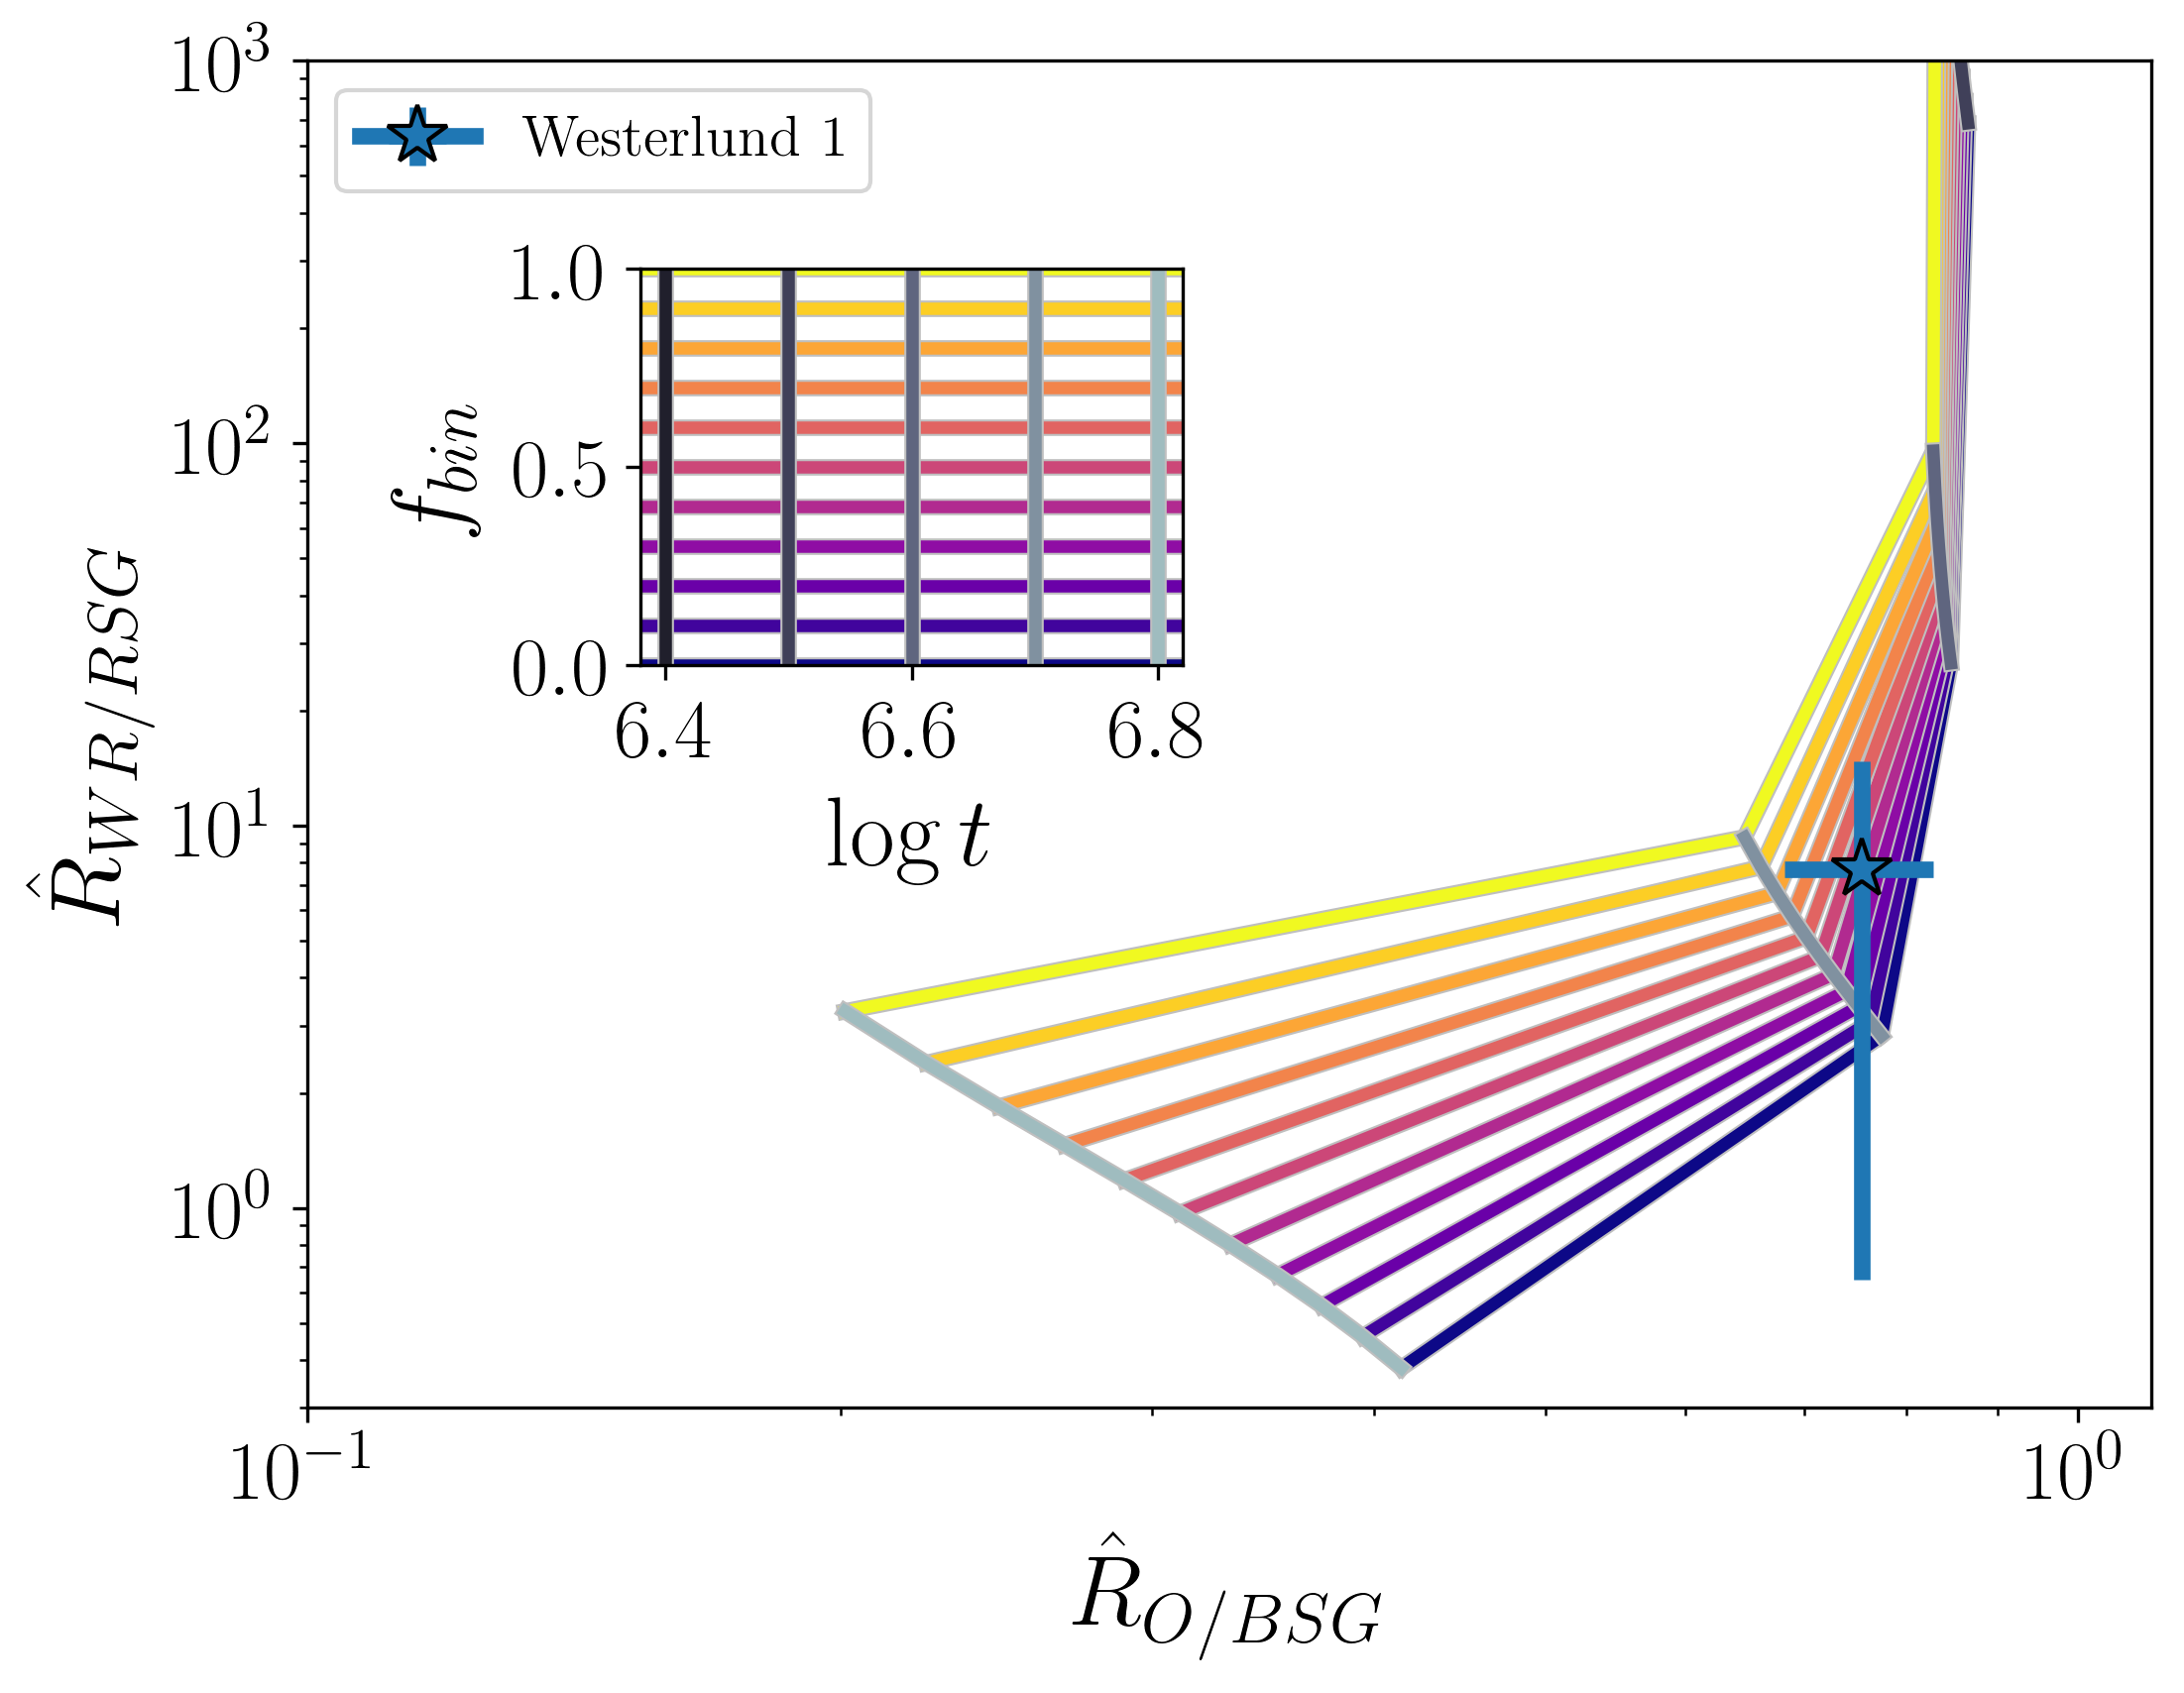

In [10]:
fig, ax = plot_ratios(ratio1='O/BSG',ratio2='WR/RSG',par3='z',par3val='z014',constraint_dict={'logtime':(6.4,6.9),'Lcuts':(4.9,4.9,5.1,4.9)})
fig.set_figheight(6)
fig.set_figwidth(8)
fig.dpi = 300

ax[0].errorbar(OBSG_W[0],WRSG_W[0],yerr=[np.array([WRSG_W[1],WRSG_W[2]])],xerr=[np.array([OBSG_W[1],OBSG_W[2]])],label='Westerlund 1',zorder=50,lw=4,marker='*',mec='k',ms=15)
ax[0].legend(loc=2,prop={'size':14})
ax[0].set(title='',ylim=(0.3,1e3),xlim=(1e-1,1.1))
ax[0].change_geometry(1,1,1)
ax[1].change_geometry(3,3,4)
ax1_pos = ax[1].get_position()
ax[1].set_position([ax1_pos.x0+0.14,ax1_pos.y0+0.15, ax1_pos.width, ax1_pos.height])

ax[0].xaxis.label.set_size(24)
ax[0].yaxis.label.set_size(24)
ax[1].xaxis.label.set_size(24)
ax[1].yaxis.label.set_size(24)
ax[1].set_yticks([0,0.5,1])
for tick in ax[0].xaxis.get_major_ticks():
    tick.label.set_fontsize(20)
for tick in ax[0].yaxis.get_major_ticks():
    tick.label.set_fontsize(20)
for tick in ax[1].xaxis.get_major_ticks():
    tick.label.set_fontsize(20)
for tick in ax[1].yaxis.get_major_ticks():
    tick.label.set_fontsize(20)
    
plt.savefig('wd1_binary.pdf')

../code/diagnostics.py:168: RuntimeWarning: divide by zero encountered in true_divide
  return np.divide(subtype1_t,subtype2_t)


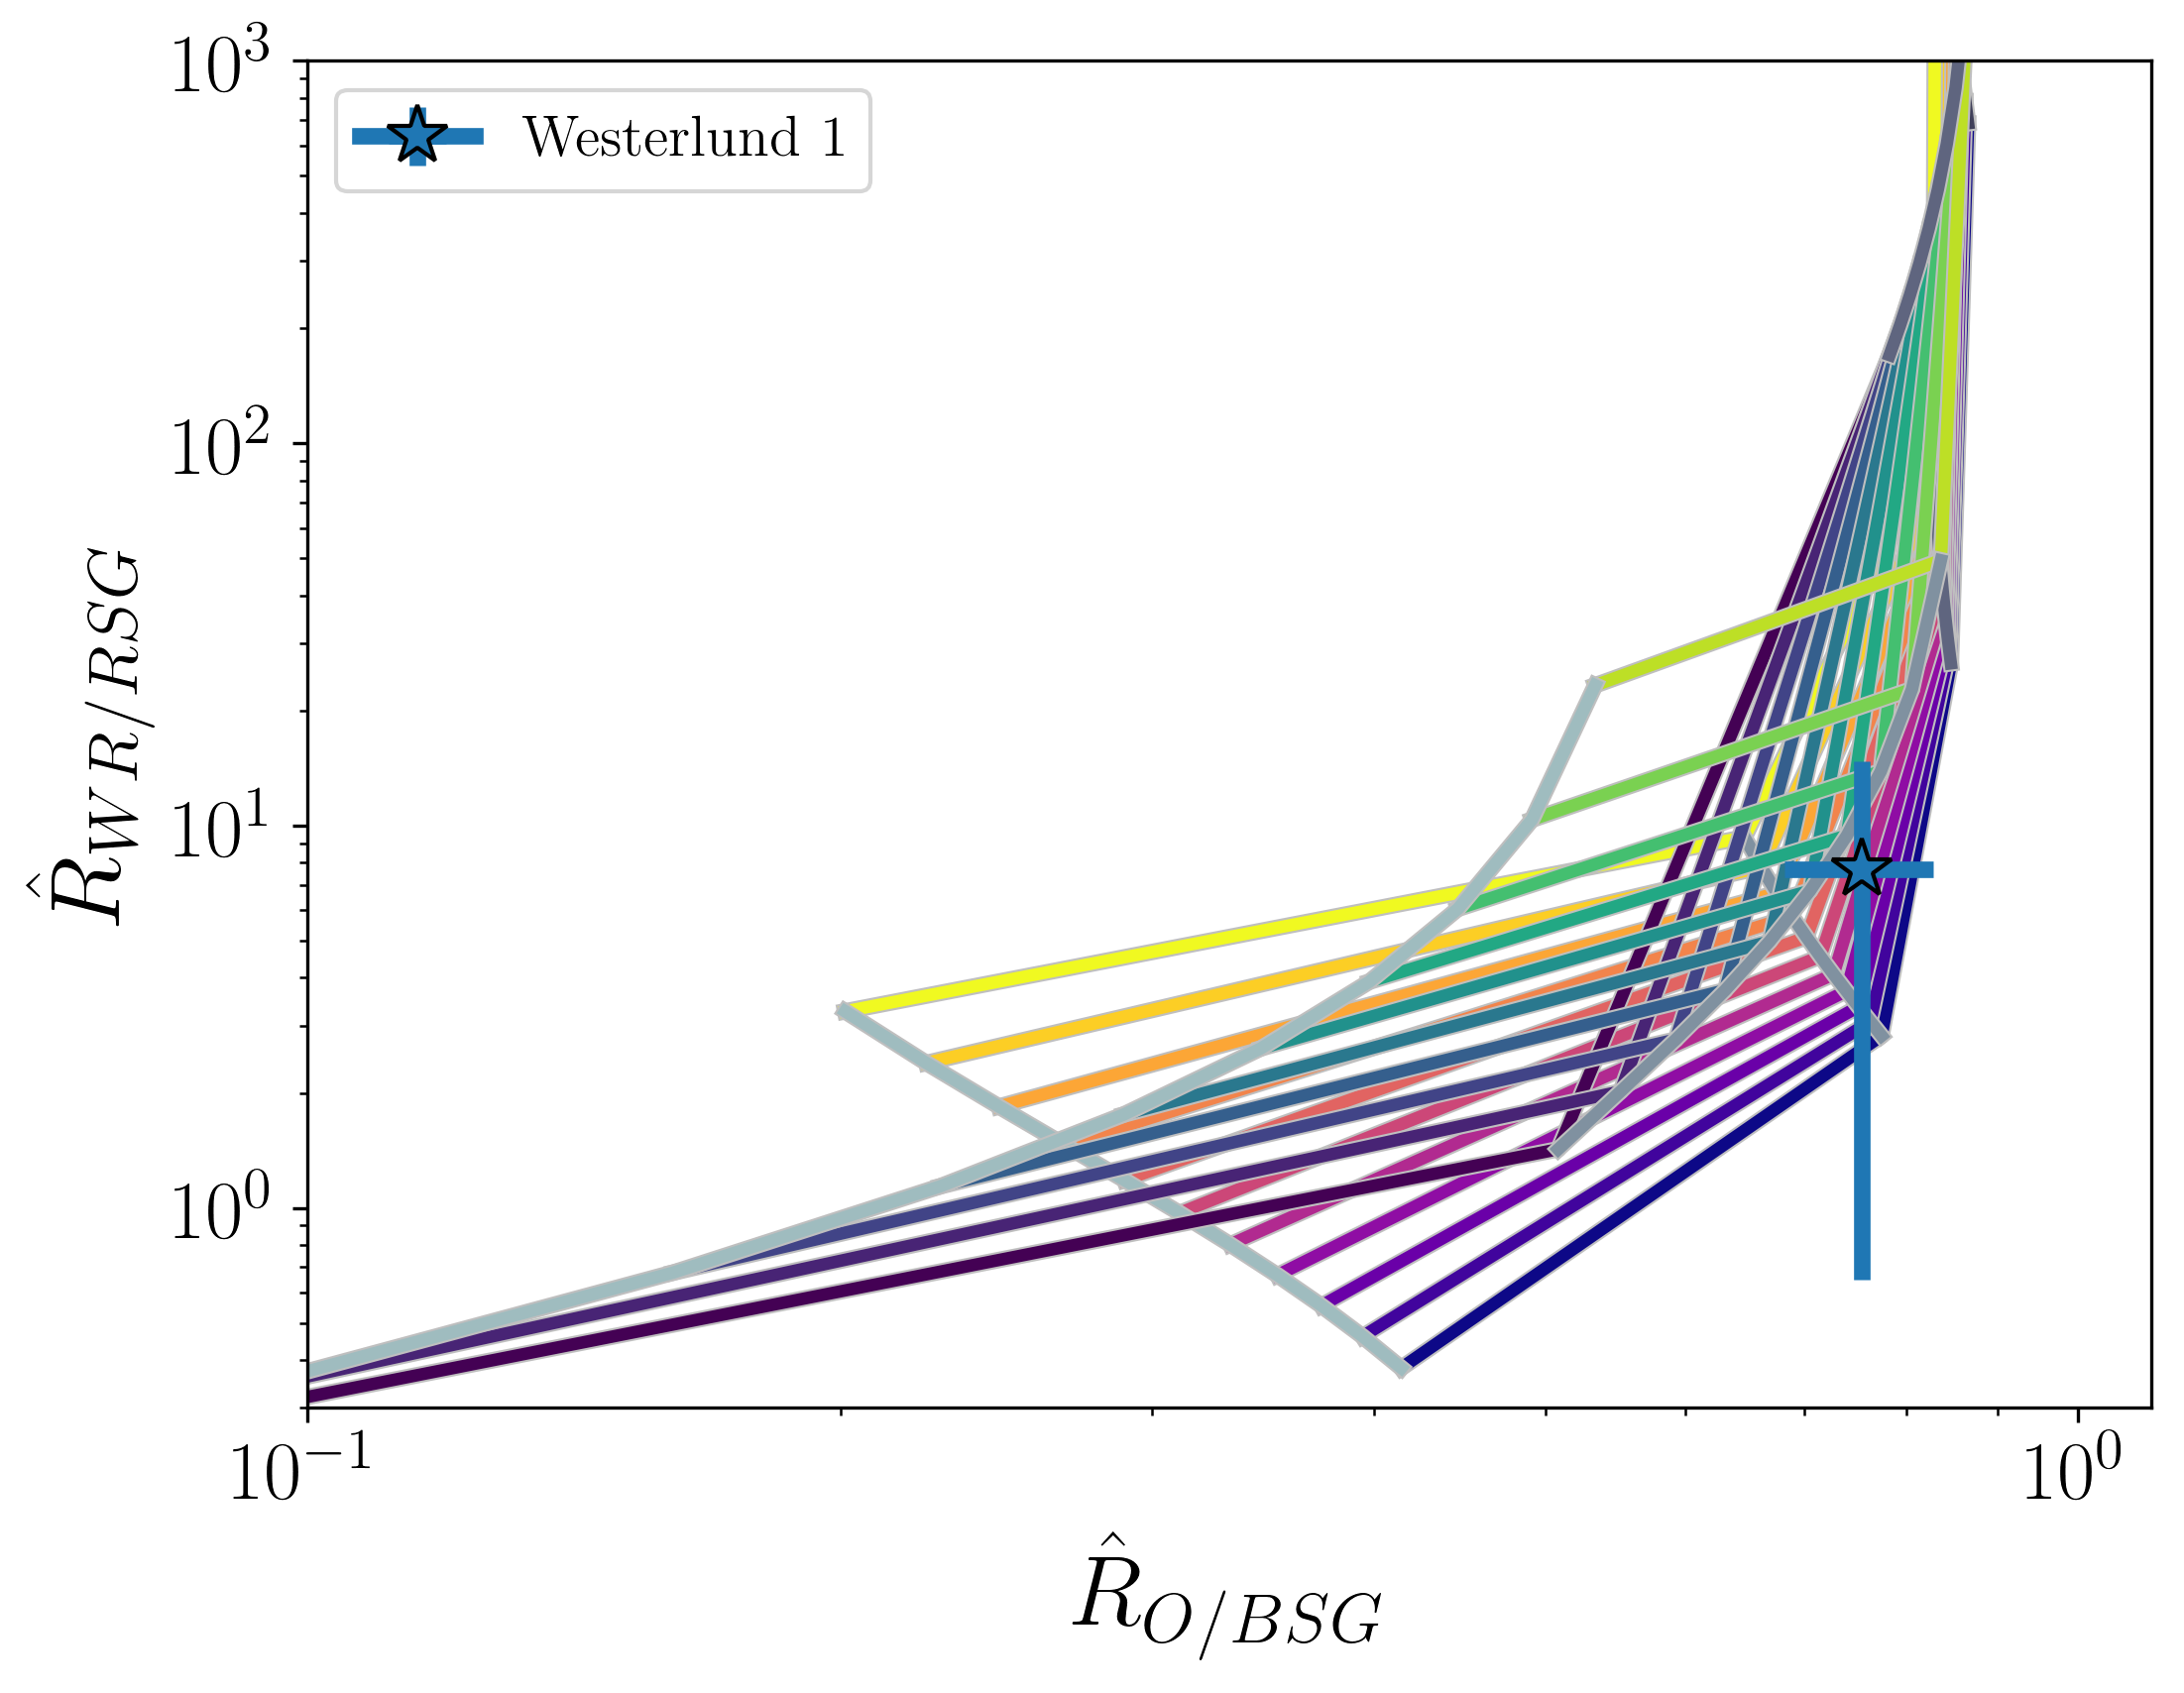

In [11]:
fig, ax = plot_ratios(ratio1='O/BSG',ratio2='WR/RSG',par3='z',par3val='z014',constraint_dict={'logtime':(6.4,6.9),'Lcuts':(4.9,4.9,5.1,4.9)})
fig, ax = plot_ratios(ratio1='O/BSG',ratio2='WR/RSG',par3='z',par3val='z014',models='Geneva',constraint_dict={'logtime':(6.4,6.9),'Lcuts':(4.9,4.9,5.1,4.9)},fig=fig)
fig.set_figheight(6)
fig.set_figwidth(8)
fig.dpi = 300
ax[0].change_geometry(1,1,1)
ax[1].remove()

ax[0].errorbar(OBSG_W[0],WRSG_W[0],yerr=[np.array([WRSG_W[1],WRSG_W[2]])],xerr=[np.array([OBSG_W[1],OBSG_W[2]])],label='Westerlund 1',zorder=50,lw=4,marker='*',mec='k',ms=15)
ax[0].legend(loc=2,prop={'size':14})
ax[0].set(title='',ylim=(0.3,1e3),xlim=(1e-1,1.1))

ax[0].xaxis.label.set_size(24)
ax[0].yaxis.label.set_size(24)
for tick in ax[0].xaxis.get_major_ticks():
    tick.label.set_fontsize(20)
for tick in ax[0].yaxis.get_major_ticks():
    tick.label.set_fontsize(20)
    
plt.savefig('wd1_allmodels.pdf')

Let's check out an older cluster: $h+\chi$ Per! From Currie et al. 2009, we can estimate these ratios

In [12]:
currie = Table.read('../data/Currie10/currie10.fits')
O_per = len(currie[currie['SpT'] < 10])
BSG_per = len(currie[(currie['SpT'] < 30) & (currie['L'] == 1)])
WR_per = 0
RSG_per = len(currie[(currie['SpT'] >= 50) & (currie['L'] == 1)])
OBSG_per = MCMC_ratio_errors(O_per,BSG_per)[0]
WRRSG_per = MCMC_ratio_errors(WR_per,RSG_per)[0]

/Users/carina/anaconda/lib/python3.5/site-packages/emcee/ensemble.py:335: RuntimeWarning: invalid value encountered in subtract
  lnpdiff = (self.dim - 1.) * np.log(zz) + newlnprob - lnprob0
/Users/carina/anaconda/lib/python3.5/site-packages/emcee/ensemble.py:336: RuntimeWarning: invalid value encountered in greater
  accept = (lnpdiff > np.log(self._random.rand(len(lnpdiff))))


In [13]:
for r,lab in zip([OBSG_per,WRRSG_per],['O/BSG','WR/RSG']):
    print('${0} = {1:.3f} ^{{+{2:.3f}}}_{{{3:.3f}}}$'.format(lab,r[0],r[1],r[2]))

$O/BSG = 0.041 ^{+0.051}_{0.026}$
$WR/RSG = 0.033 ^{+0.119}_{0.030}$


../code/diagnostics.py:168: RuntimeWarning: invalid value encountered in true_divide
  return np.divide(subtype1_t,subtype2_t)
/Users/carina/anaconda/lib/python3.5/site-packages/matplotlib/ticker.py:2241: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  "Data has no positive values, and therefore cannot be "


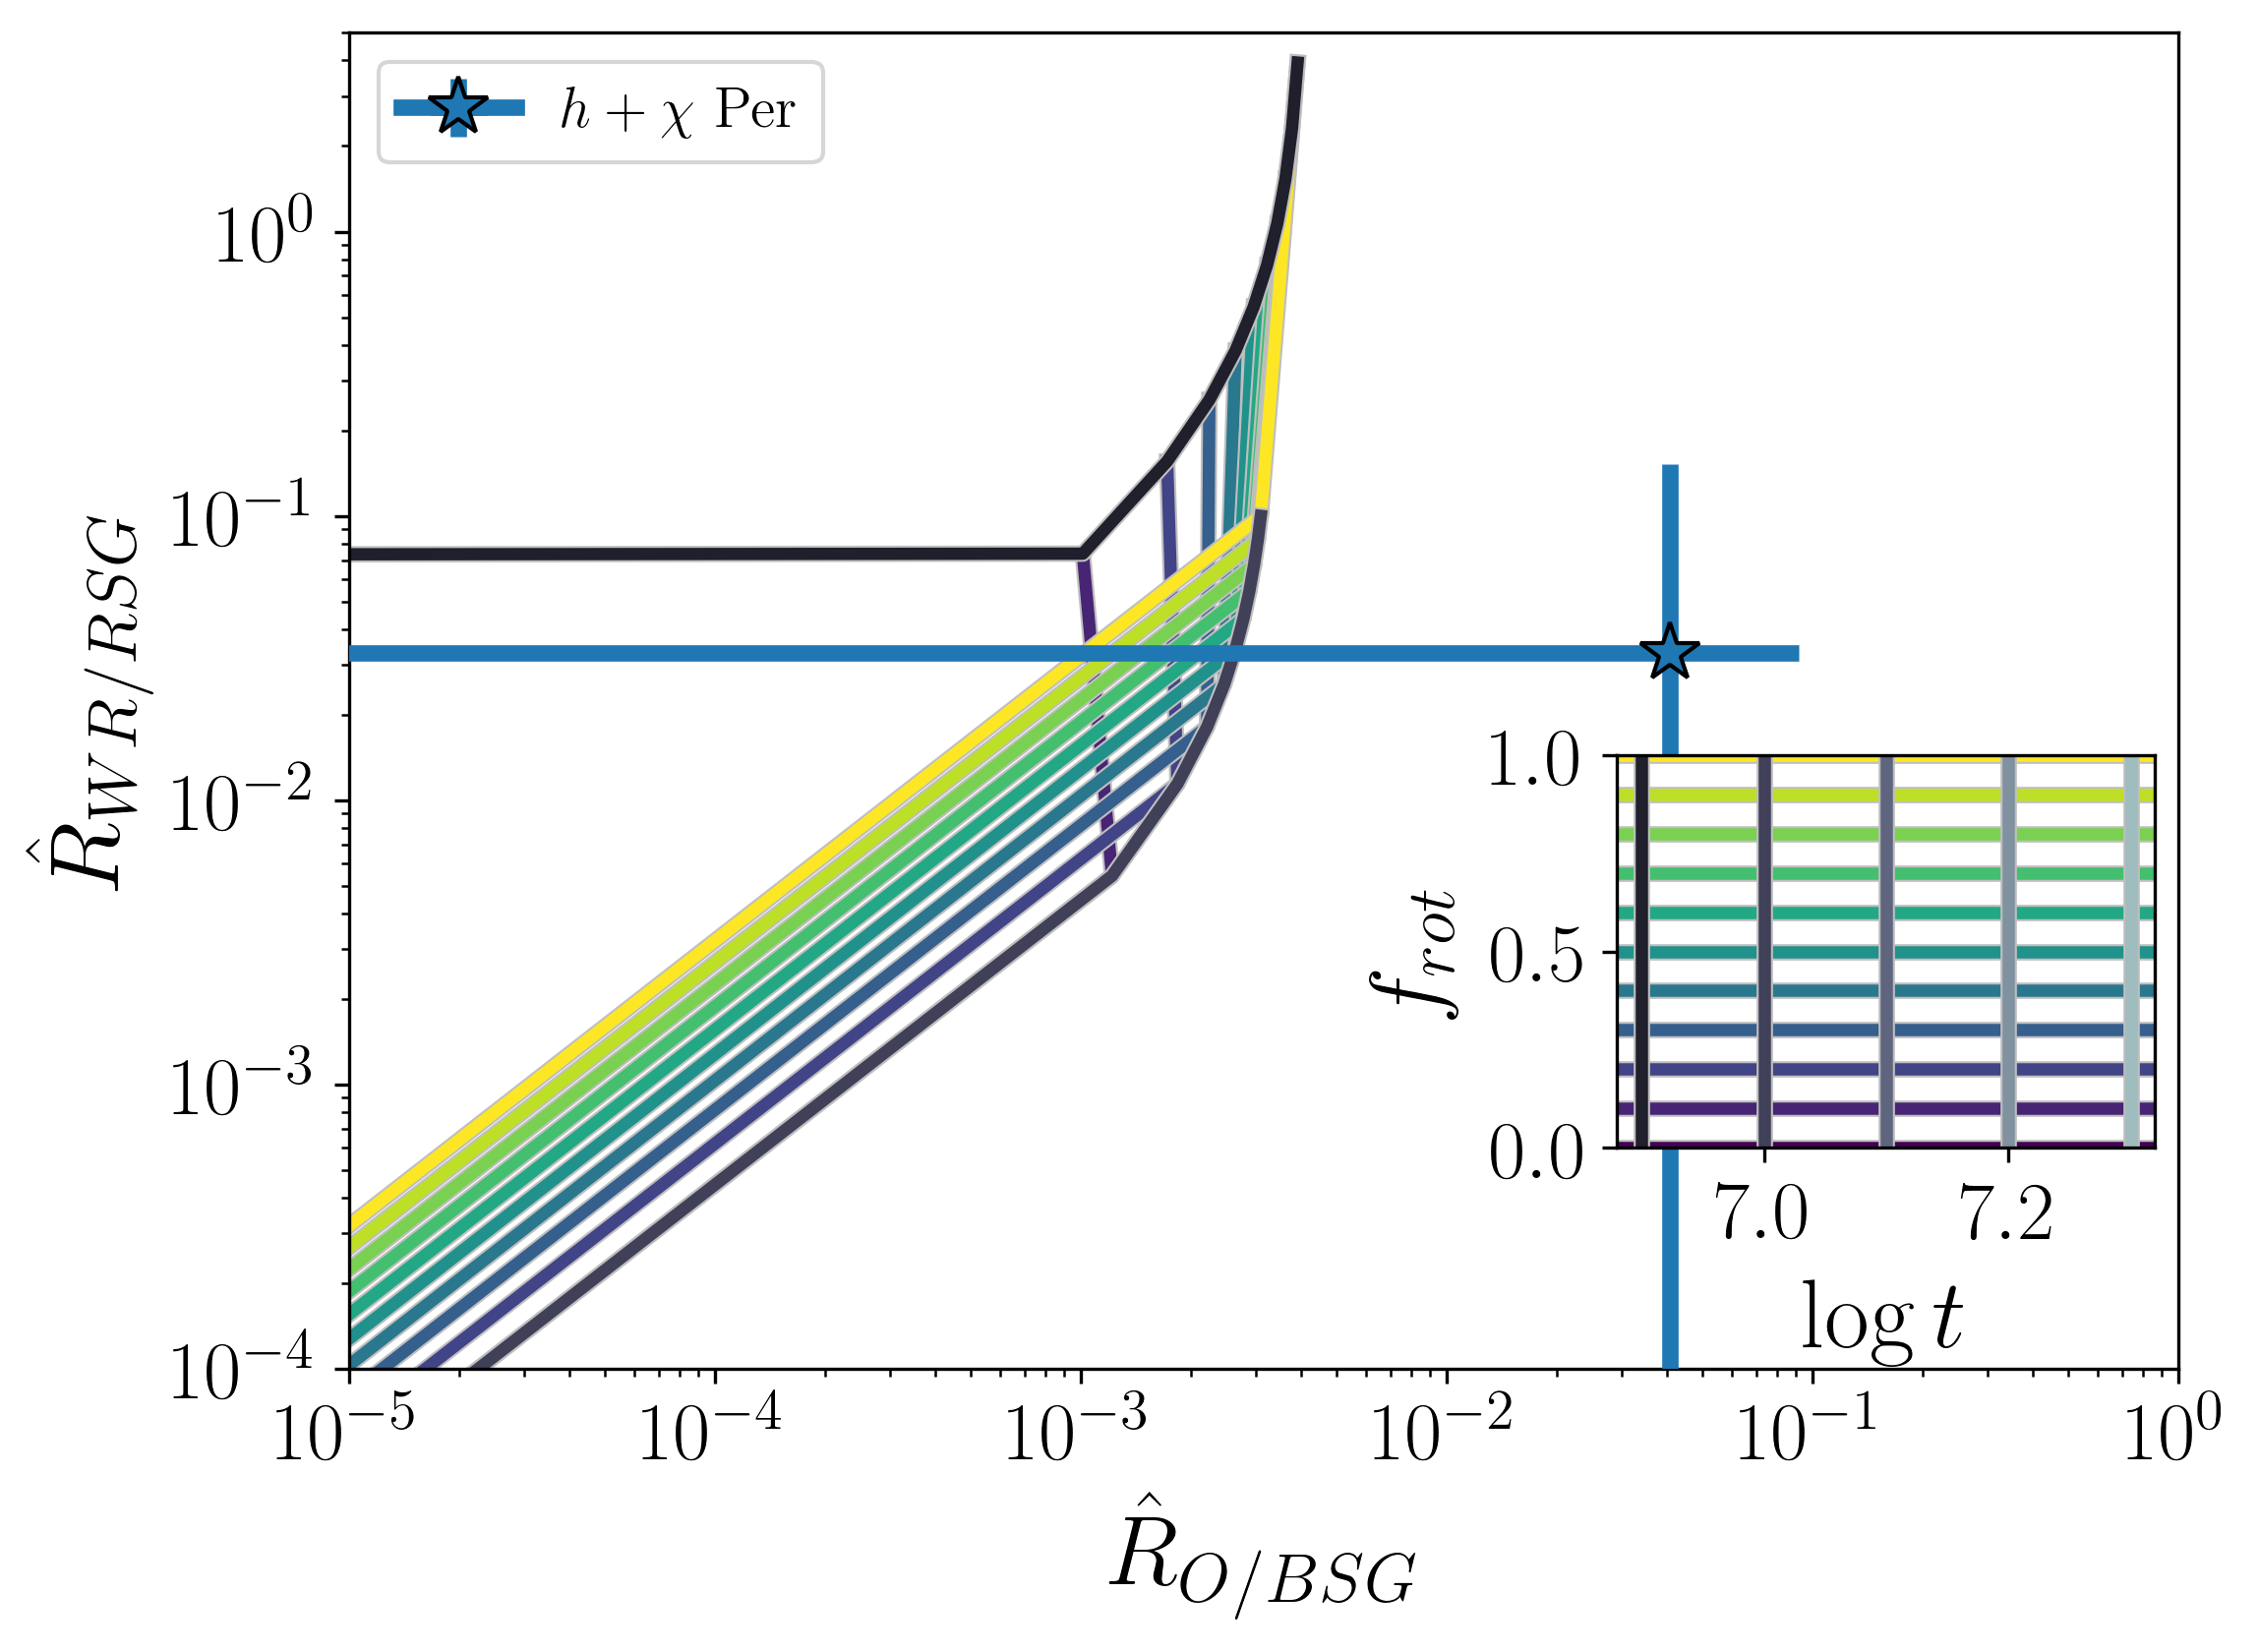

In [14]:
fig, ax = plot_ratios(ratio1='O/BSG',ratio2='WR/RSG',par3='z',par3val='z014',models='Geneva',constraint_dict={'logtime':(6.9,7.4),'Lcuts':(0.0,4.9,4.9,4.9)})
fig.set_figheight(6)
fig.set_figwidth(8)
fig.dpi = 300

ax[0].errorbar(OBSG_per[0],WRRSG_per[0],yerr=[np.array([WRRSG_per[1],WRRSG_per[2]])],xerr=[np.array([OBSG_per[1],OBSG_per[2]])],label='$h+\chi$ Per',zorder=50,lw=4,marker='*',mec='k',ms=15)
ax[0].legend(loc=2,prop={'size':14})
ax[0].set(title='',xlim=(1e-5,1),ylim=(1e-4,5))
ax[0].change_geometry(1,1,1)
ax[1].change_geometry(3,3,9)
ax1_pos = ax[1].get_position()
ax[1].set_position([ax1_pos.x0-0.01,ax1_pos.y0+0.125, ax1_pos.width, ax1_pos.height])

ax[0].xaxis.label.set_size(24)
ax[0].yaxis.label.set_size(24)
ax[1].xaxis.label.set_size(24)
ax[1].yaxis.label.set_size(24)
ax[1].set_yticks([0,0.5,1])
for tick in ax[0].xaxis.get_major_ticks():
    tick.label.set_fontsize(20)
for tick in ax[0].yaxis.get_major_ticks():
    tick.label.set_fontsize(20)
for tick in ax[1].xaxis.get_major_ticks():
    tick.label.set_fontsize(20)
for tick in ax[1].yaxis.get_major_ticks():
    tick.label.set_fontsize(20)
    
plt.savefig('per_rotation.pdf')

../code/diagnostics.py:168: RuntimeWarning: invalid value encountered in true_divide
  return np.divide(subtype1_t,subtype2_t)
/Users/carina/anaconda/lib/python3.5/site-packages/matplotlib/ticker.py:2241: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  "Data has no positive values, and therefore cannot be "


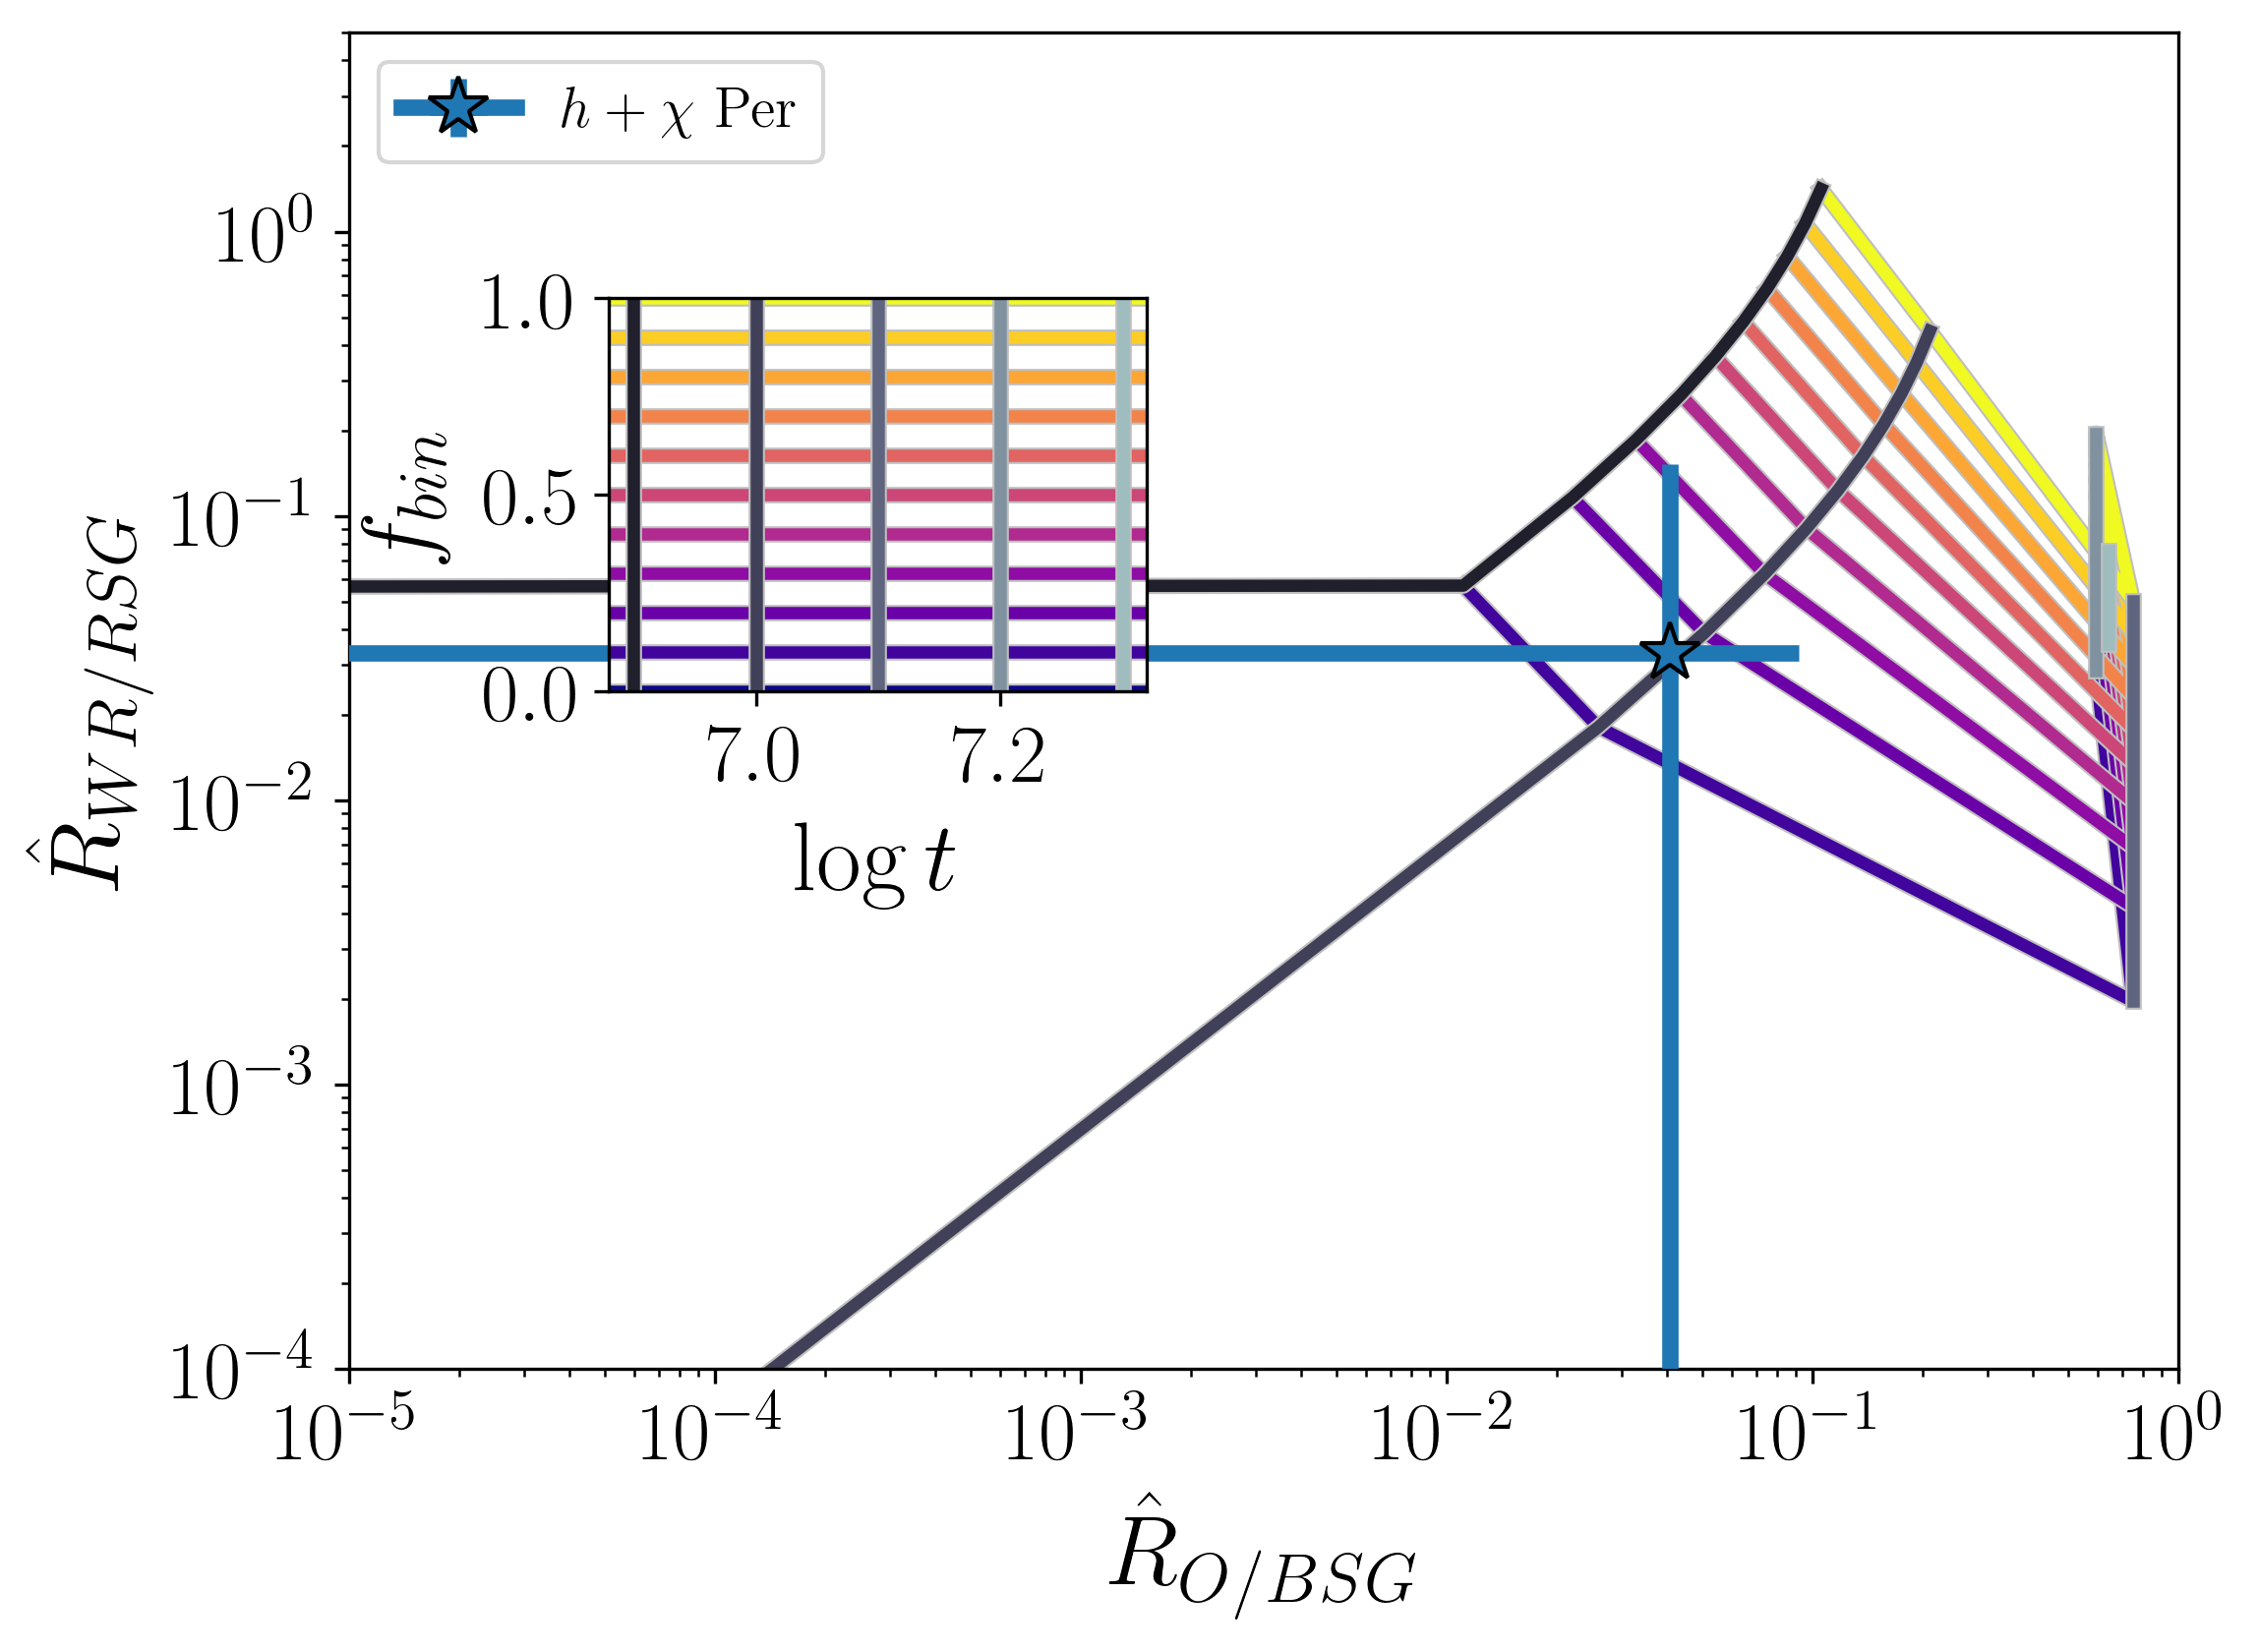

In [15]:
fig, ax = plot_ratios(ratio1='O/BSG',ratio2='WR/RSG',par3='z',par3val='z014',constraint_dict={'logtime':(6.9,7.4),'Lcuts':(0.0,4.9,4.9,4.9)})
fig.set_figheight(6)
fig.set_figwidth(8)
fig.dpi = 300

ax[0].errorbar(OBSG_per[0],WRRSG_per[0],yerr=[np.array([WRRSG_per[1],WRRSG_per[2]])],xerr=[np.array([OBSG_per[1],OBSG_per[2]])],label='$h+\chi$ Per',zorder=50,lw=4,marker='*',mec='k',ms=15)
ax[0].legend(loc=2,prop={'size':14})
ax[0].set(title='',xlim=(1e-5,1),ylim=(1e-4,5))
ax[0].change_geometry(1,1,1)
ax[1].change_geometry(3,3,1)
ax1_pos = ax[1].get_position()
ax[1].set_position([ax1_pos.x0+0.11,ax1_pos.y0-0.15, ax1_pos.width, ax1_pos.height])

ax[0].xaxis.label.set_size(24)
ax[0].yaxis.label.set_size(24)
ax[1].xaxis.label.set_size(24)
ax[1].yaxis.label.set_size(24)
ax[1].set_yticks([0,0.5,1])
for tick in ax[0].xaxis.get_major_ticks():
    tick.label.set_fontsize(20)
for tick in ax[0].yaxis.get_major_ticks():
    tick.label.set_fontsize(20)
for tick in ax[1].xaxis.get_major_ticks():
    tick.label.set_fontsize(20)
for tick in ax[1].yaxis.get_major_ticks():
    tick.label.set_fontsize(20)
    
plt.savefig('per_binary.pdf')

../code/diagnostics.py:168: RuntimeWarning: invalid value encountered in true_divide
  return np.divide(subtype1_t,subtype2_t)
/Users/carina/anaconda/lib/python3.5/site-packages/matplotlib/ticker.py:2241: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  "Data has no positive values, and therefore cannot be "


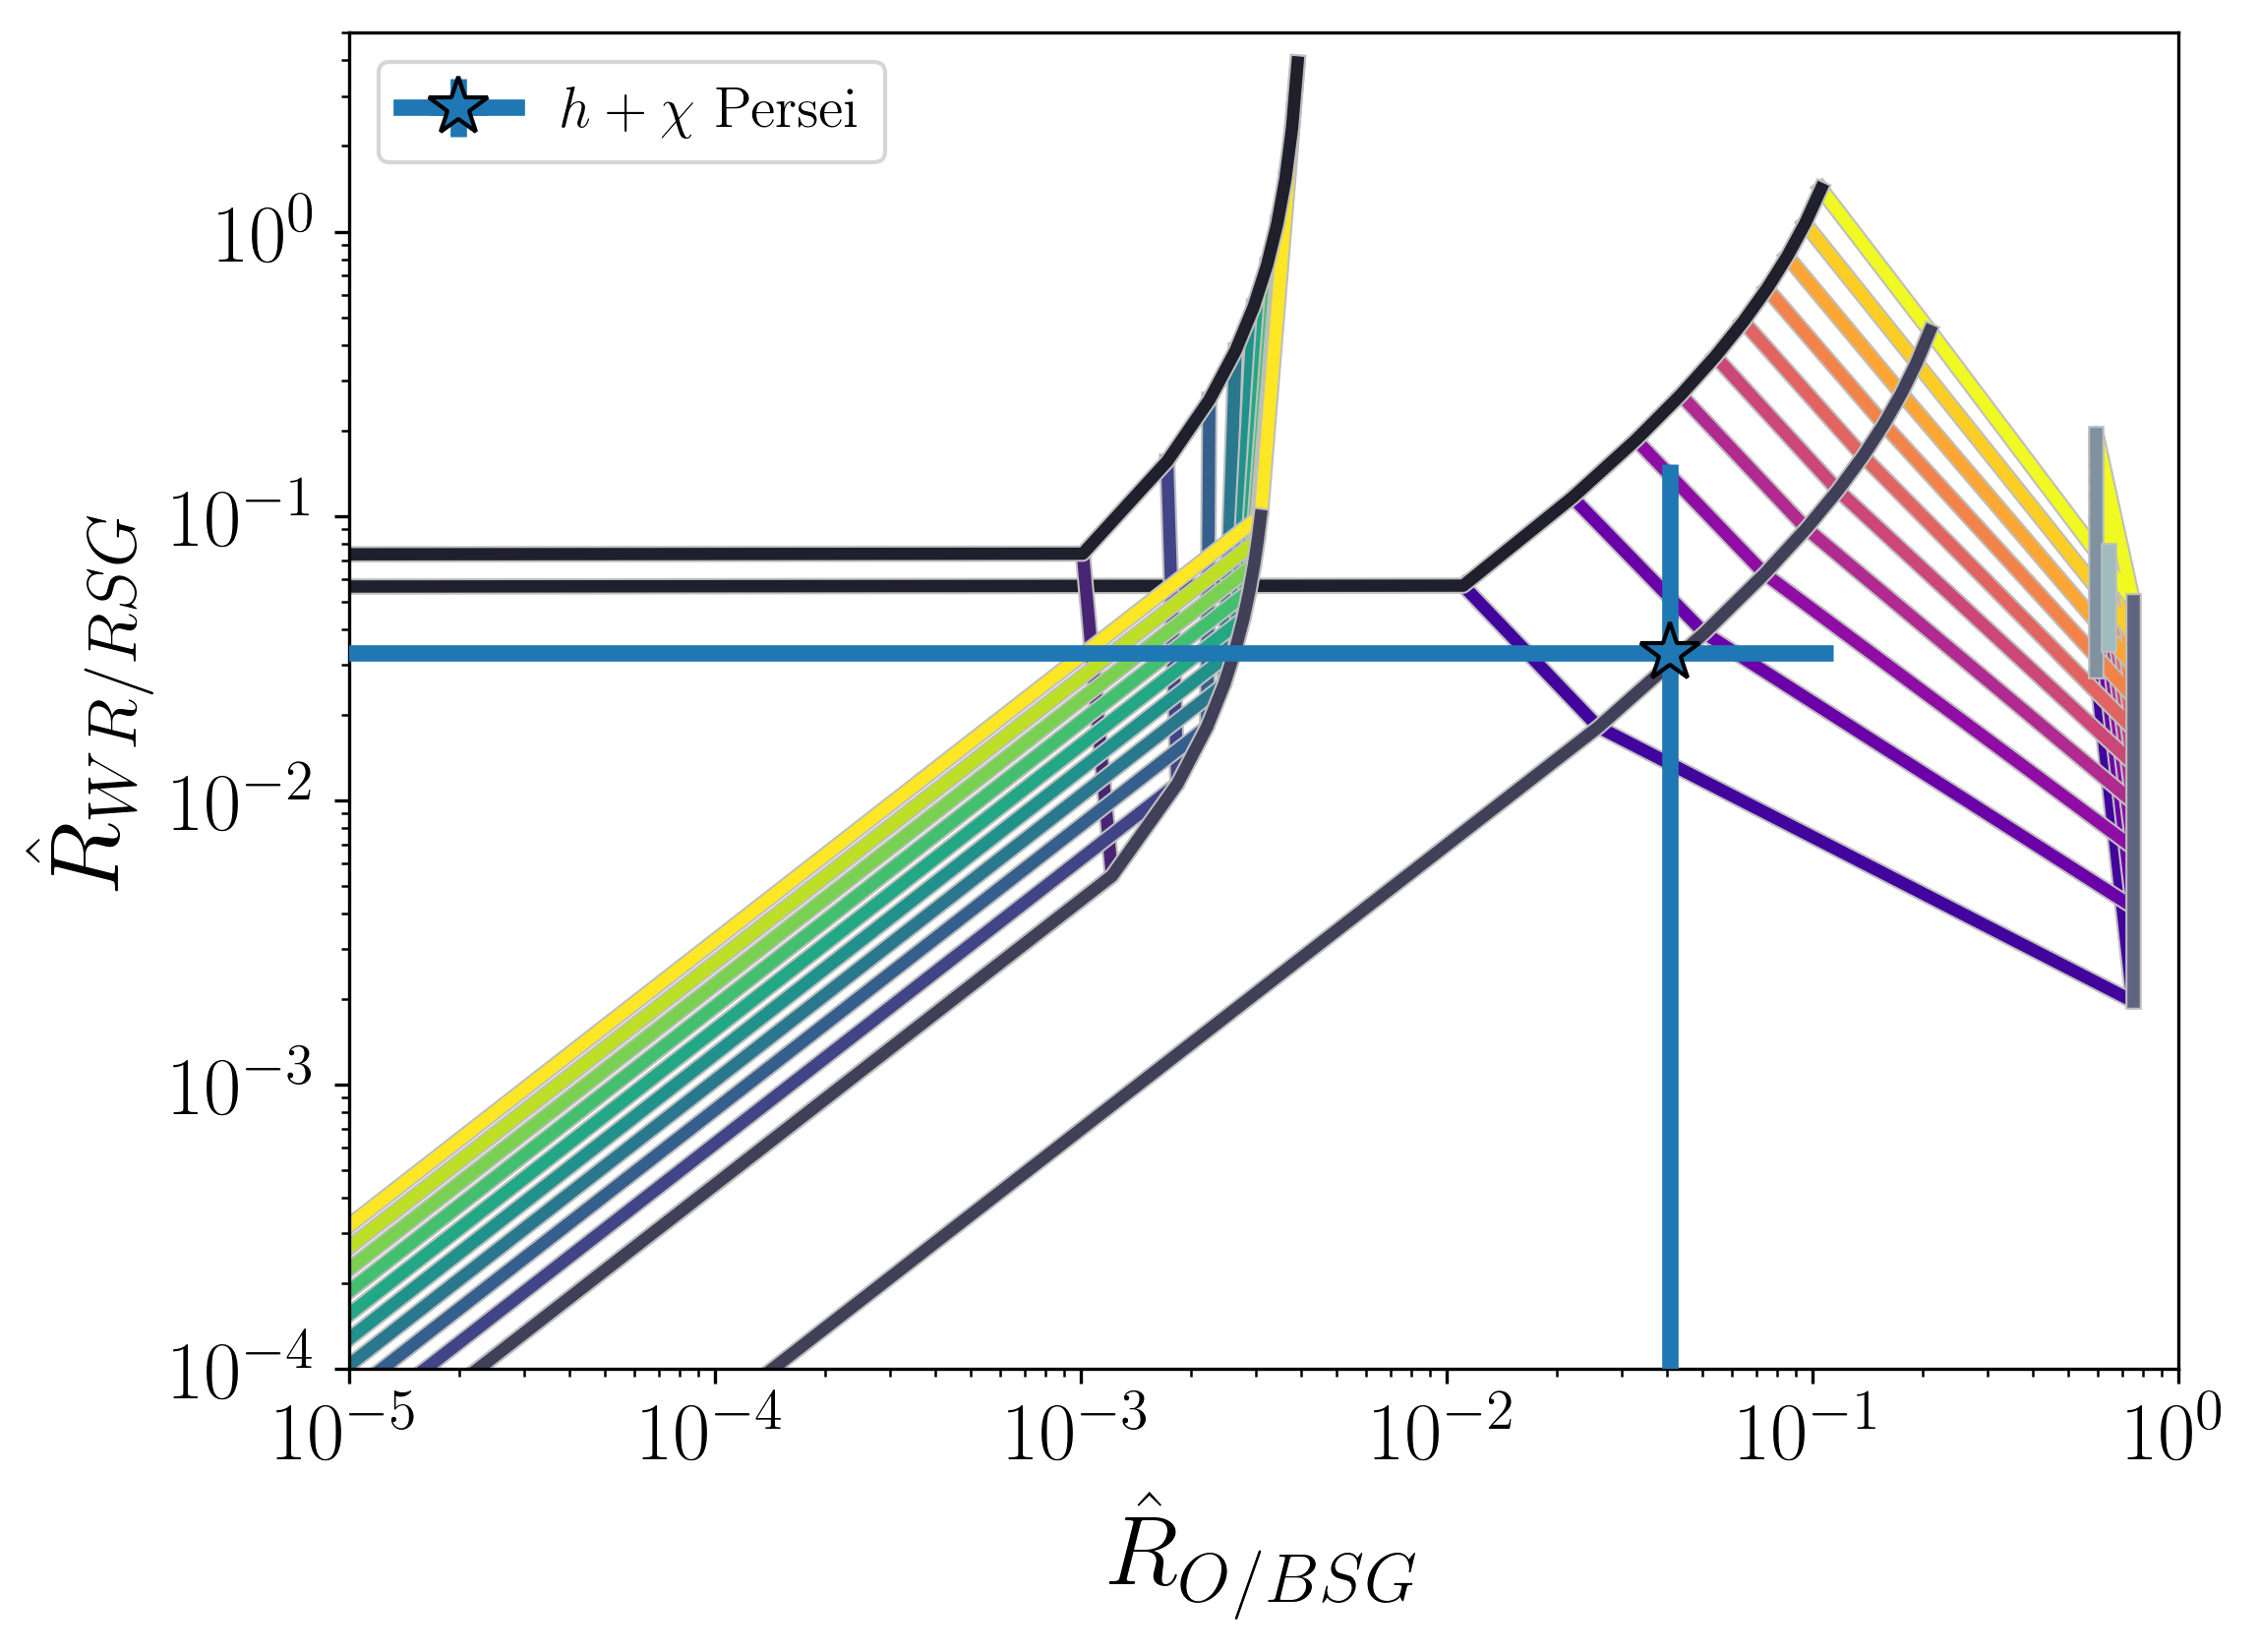

In [16]:
fig, ax = plot_ratios(ratio1='O/BSG',ratio2='WR/RSG',par3='z',par3val='z014',constraint_dict={'logtime':(6.9,7.4),'Lcuts':(0.0,4.9,4.9,4.9)})
fig, ax = plot_ratios(ratio1='O/BSG',ratio2='WR/RSG',par3='z',par3val='z014',models='Geneva',constraint_dict={'logtime':(6.9,7.4),'Lcuts':(0.0,4.9,4.9,4.9)},fig=fig)
fig.set_figheight(6)
fig.set_figwidth(8)
fig.dpi = 300
ax[0].set(title='',xlim=(1e-5,1),ylim=(1e-4,5))
ax[0].change_geometry(1,1,1)
ax[1].remove()

ax[0].errorbar(OBSG_per[0],WRRSG_per[0],yerr=[np.array([WRRSG_per[1],WRRSG_per[2]])],xerr=[np.array([OBSG_W[1],OBSG_W[2]])],label='$h+\chi$ Persei',zorder=50,lw=4,marker='*',mec='k',ms=15)
ax[0].legend(loc=2,prop={'size':14})

ax[0].xaxis.label.set_size(24)
ax[0].yaxis.label.set_size(24)
for tick in ax[0].xaxis.get_major_ticks():
    tick.label.set_fontsize(20)
for tick in ax[0].yaxis.get_major_ticks():
    tick.label.set_fontsize(20)

plt.savefig('per_allmodels.pdf')

We've also implemented complex star formation histories! For now, let's just stick with something constantly forming stars. Note that the Geneva models don't form WC stars at low metallicities. 

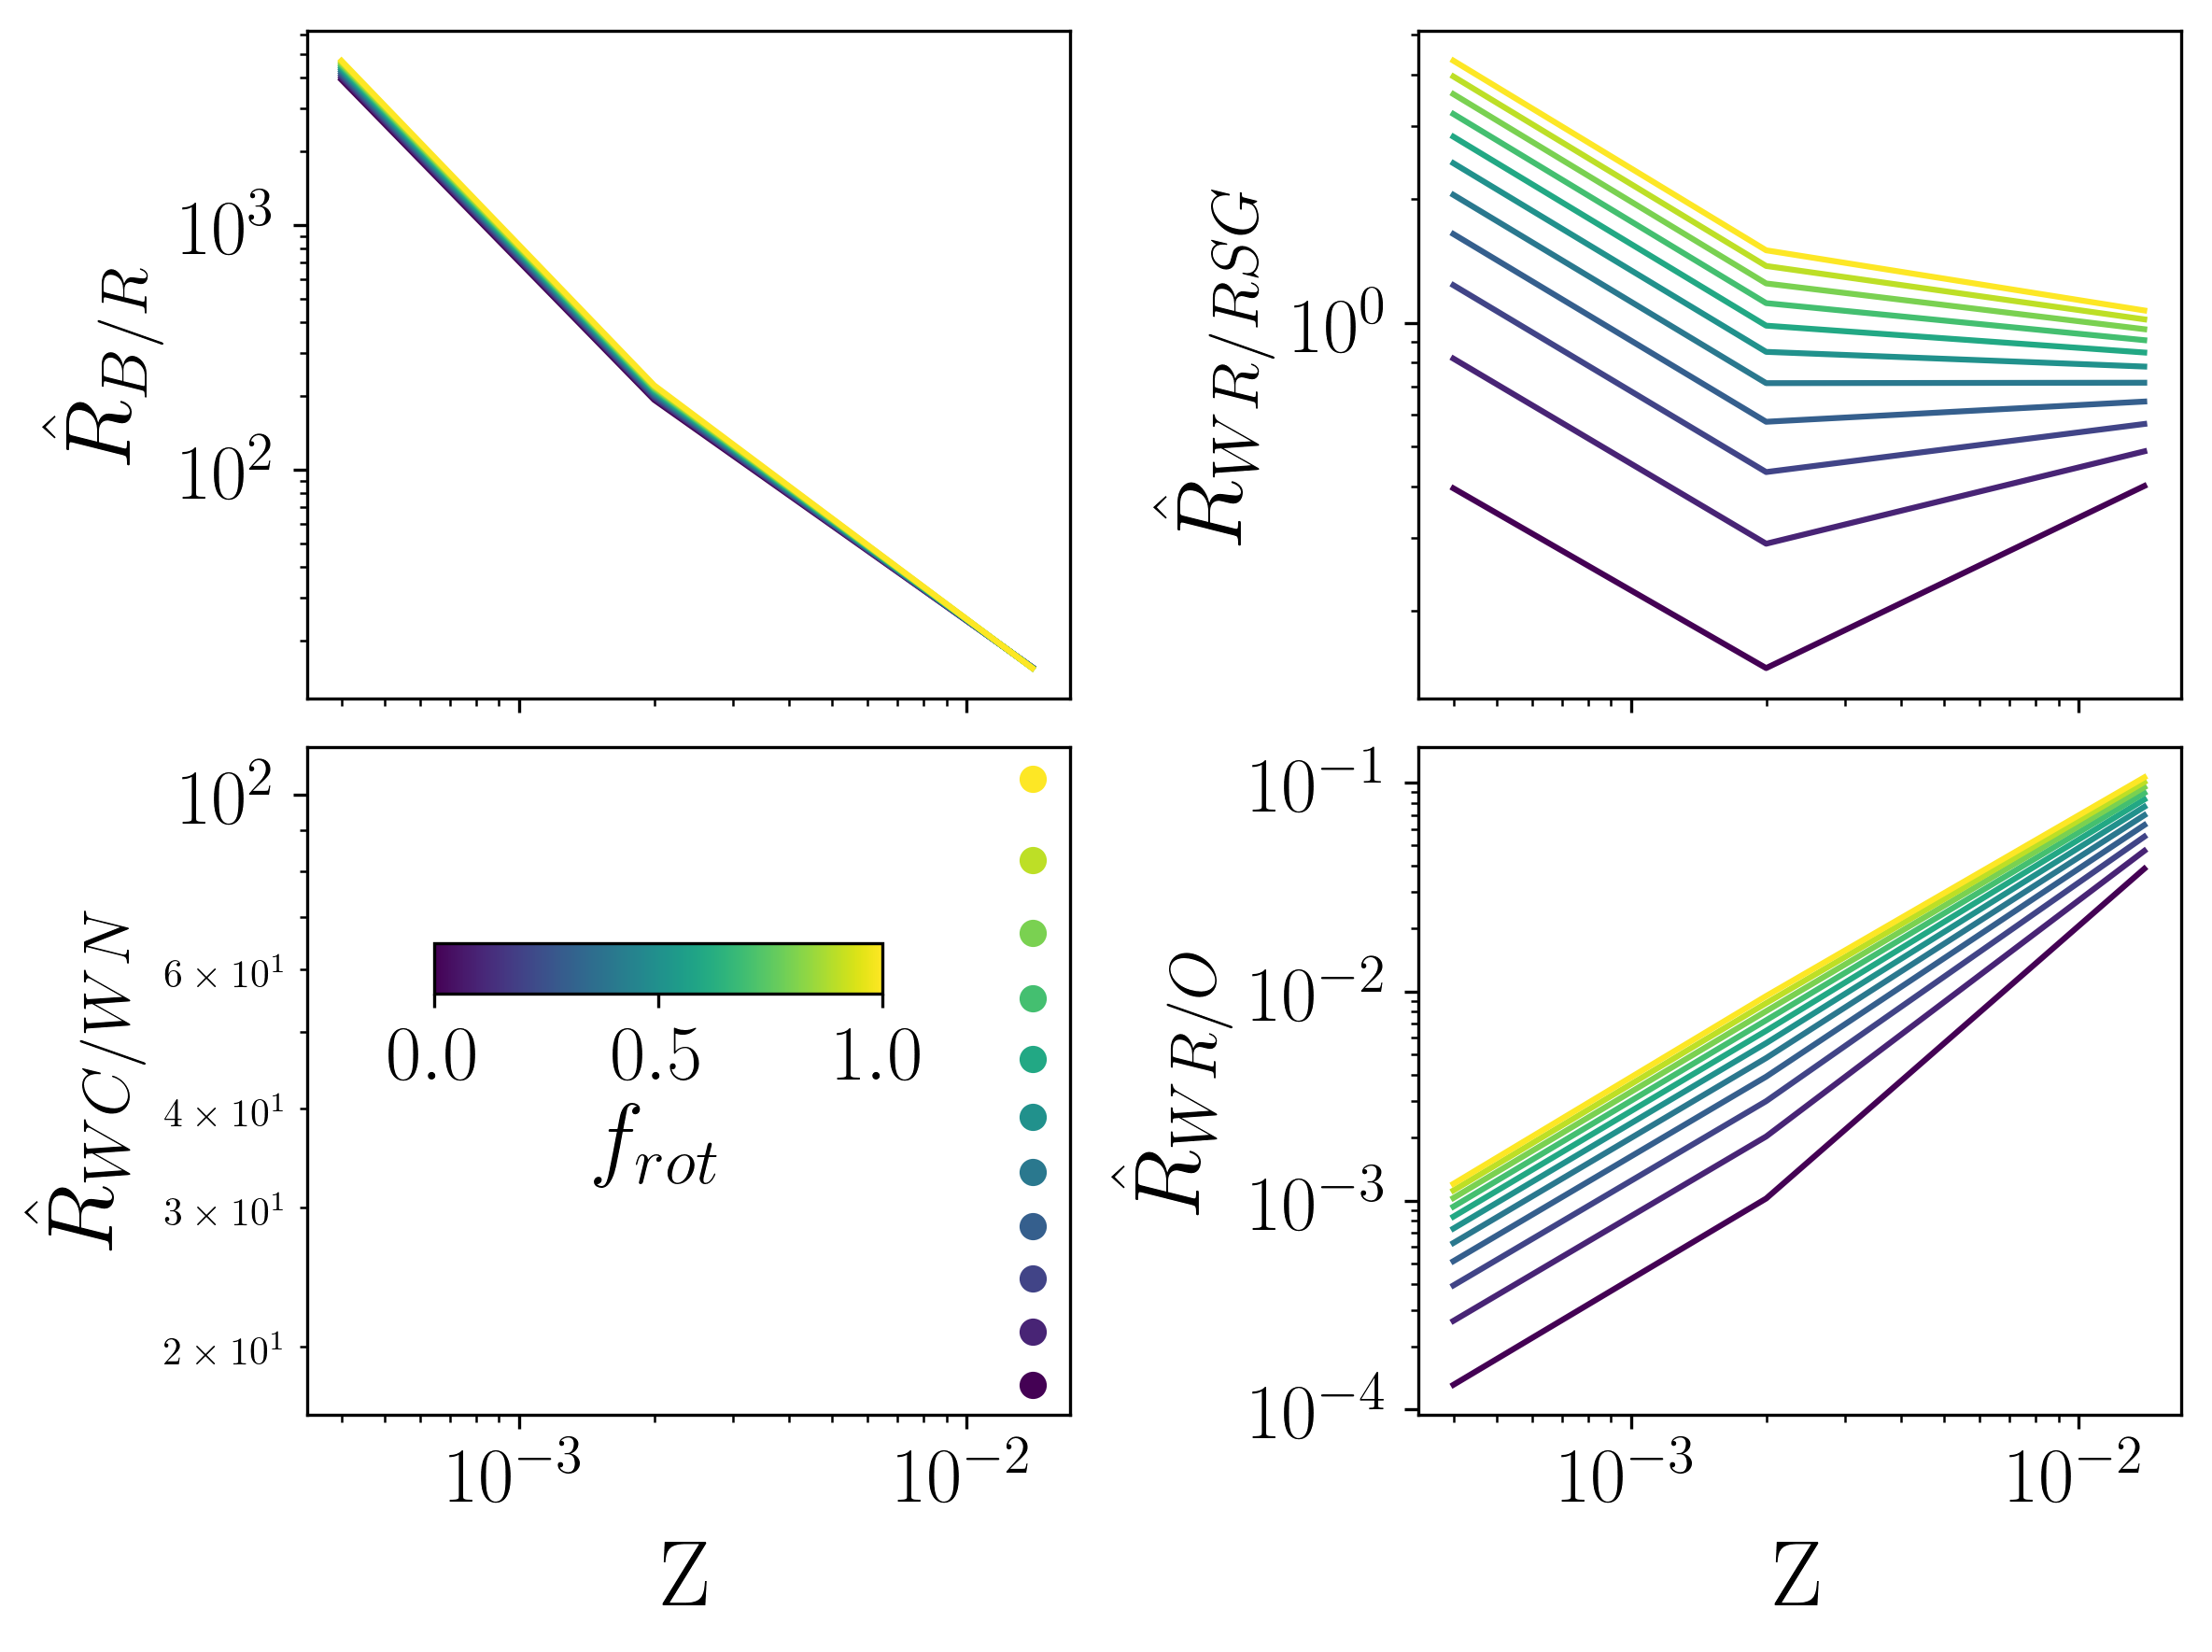

In [17]:
fig, axes = plt.subplots(2,2,figsize=(8,6),dpi=300,sharex=True)

for f_rot in f_rots:
    axes[0,0].loglog([0.0004,0.002,0.014],[get_ratio_at_parameter('BSG/RSG',z,np.log10(13.7e9),f_rot=f_rot,SFH='const',Lcut=4.9) for z in ['z0004','z002','z014']],c=rcmap(f_rot),path_effects=[pe.Stroke(linewidth=1, foreground='0.75'), pe.Normal()])
    axes[0,1].loglog([0.0004,0.002,0.014],[get_ratio_at_parameter('WR/RSG',z,np.log10(13.7e9),f_rot=f_rot,SFH='const',Lcut=4.9) for z in ['z0004','z002','z014']],c=rcmap(f_rot),path_effects=[pe.Stroke(linewidth=1, foreground='0.75'), pe.Normal()])
    axes[1,0].scatter(0.014,get_ratio_at_parameter('WC/WN','z014',np.log10(13.7e9),f_rot=f_rot,SFH='const',Lcut=4.9),c=np.array(rcmap(f_rot)).reshape(1,4))
    axes[1,1].loglog([0.0004,0.002,0.014],[get_ratio_at_parameter('WR/O',z,np.log10(13.7e9),f_rot=f_rot,SFH='const',Lcut=4.9) for z in ['z0004','z002','z014']],c=rcmap(f_rot),path_effects=[pe.Stroke(linewidth=1, foreground='0.75'), pe.Normal()])
    
axes[0,0].set(ylabel='$\hat{R}_{B/R}$')
axes[0,1].set(ylabel='$\hat{R}_{WR/RSG}$')
axes[1,0].set(ylabel='$\hat{R}_{WC/WN}$',xlabel='Z',yscale='log')
axes[1,1].set(ylabel='$\hat{R}_{WR/O}$',xlabel='Z')

for ax in axes.flatten():
    ax.xaxis.label.set_size(24)
    ax.yaxis.label.set_size(24)
    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(20)
    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(20)
        
fig.tight_layout()

cbax = fig.add_subplot(111)
cbax.set_position([0.2,0.4, 0.2, 0.03])
norm = colors.Normalize(vmin=0, vmax=1)
cb1 = cbar.ColorbarBase(cbax, cmap=rcmap,
                                norm=norm,
                                orientation='horizontal')
cb1.set_label(r'$f_{rot}$',fontsize=24)
cb1.set_ticks([0,0.5,1])
cb1.ax.tick_params(labelsize=20)

plt.savefig('ratios_constSFH.pdf')

Now let's compare to the actual observed numbers. Here they are, plus citations.

In [18]:
#WR/O - Maeder & Meynet 1994
WRO_M31 = 0.24
WRO_IMW = 0.205 #inner milky way
WRO_MMW = 0.104 #middle milky way
WRO_OMW = 0.033 #outer milky way
WRO_M33 = 0.06
WRO_LMC = 0.04
WRO_N6822 = 0.02
WRO_SMC = 0.017
WRO_IC1613 = 0.02

#B/R - Massey & Olsen 2003
BR_SMC = MCMC_ratio_errors(1484,90)[0]
BR_LMC = MCMC_ratio_errors(3164,234)[0]

#WR/RSG #Massey & Olsen 03, Neugent+18
WRRSG_SMC = MCMC_ratio_errors(12,90)[0]
WRRSG_LMC = MCMC_ratio_errors(154,234)[0]

#WC/WN - Rosslowe & Crowther 2015 for galactic, Neugent & Massey 11/12/18 for MCs, M33, M31, & Armandrov & Massey for N6822 and IC 1613
WCWN_IMW = MCMC_ratio_errors(63,124)[0]
WCWN_MMW = MCMC_ratio_errors(46,86)[0]
WCWN_OMW = MCMC_ratio_errors(10,25)[0]
WCWN_SMC = MCMC_ratio_errors(1,11)[0]
WCWN_LMC = MCMC_ratio_errors(26,128)[0]
WCWN_M31 = MCMC_ratio_errors(62,92)[0]
WCWN_M33 = MCMC_ratio_errors(26,45)[0]
WCWN_N6822 = MCMC_ratio_errors(1,11)[0]
WCWN_IC1613 = MCMC_ratio_errors(1,6)[0]

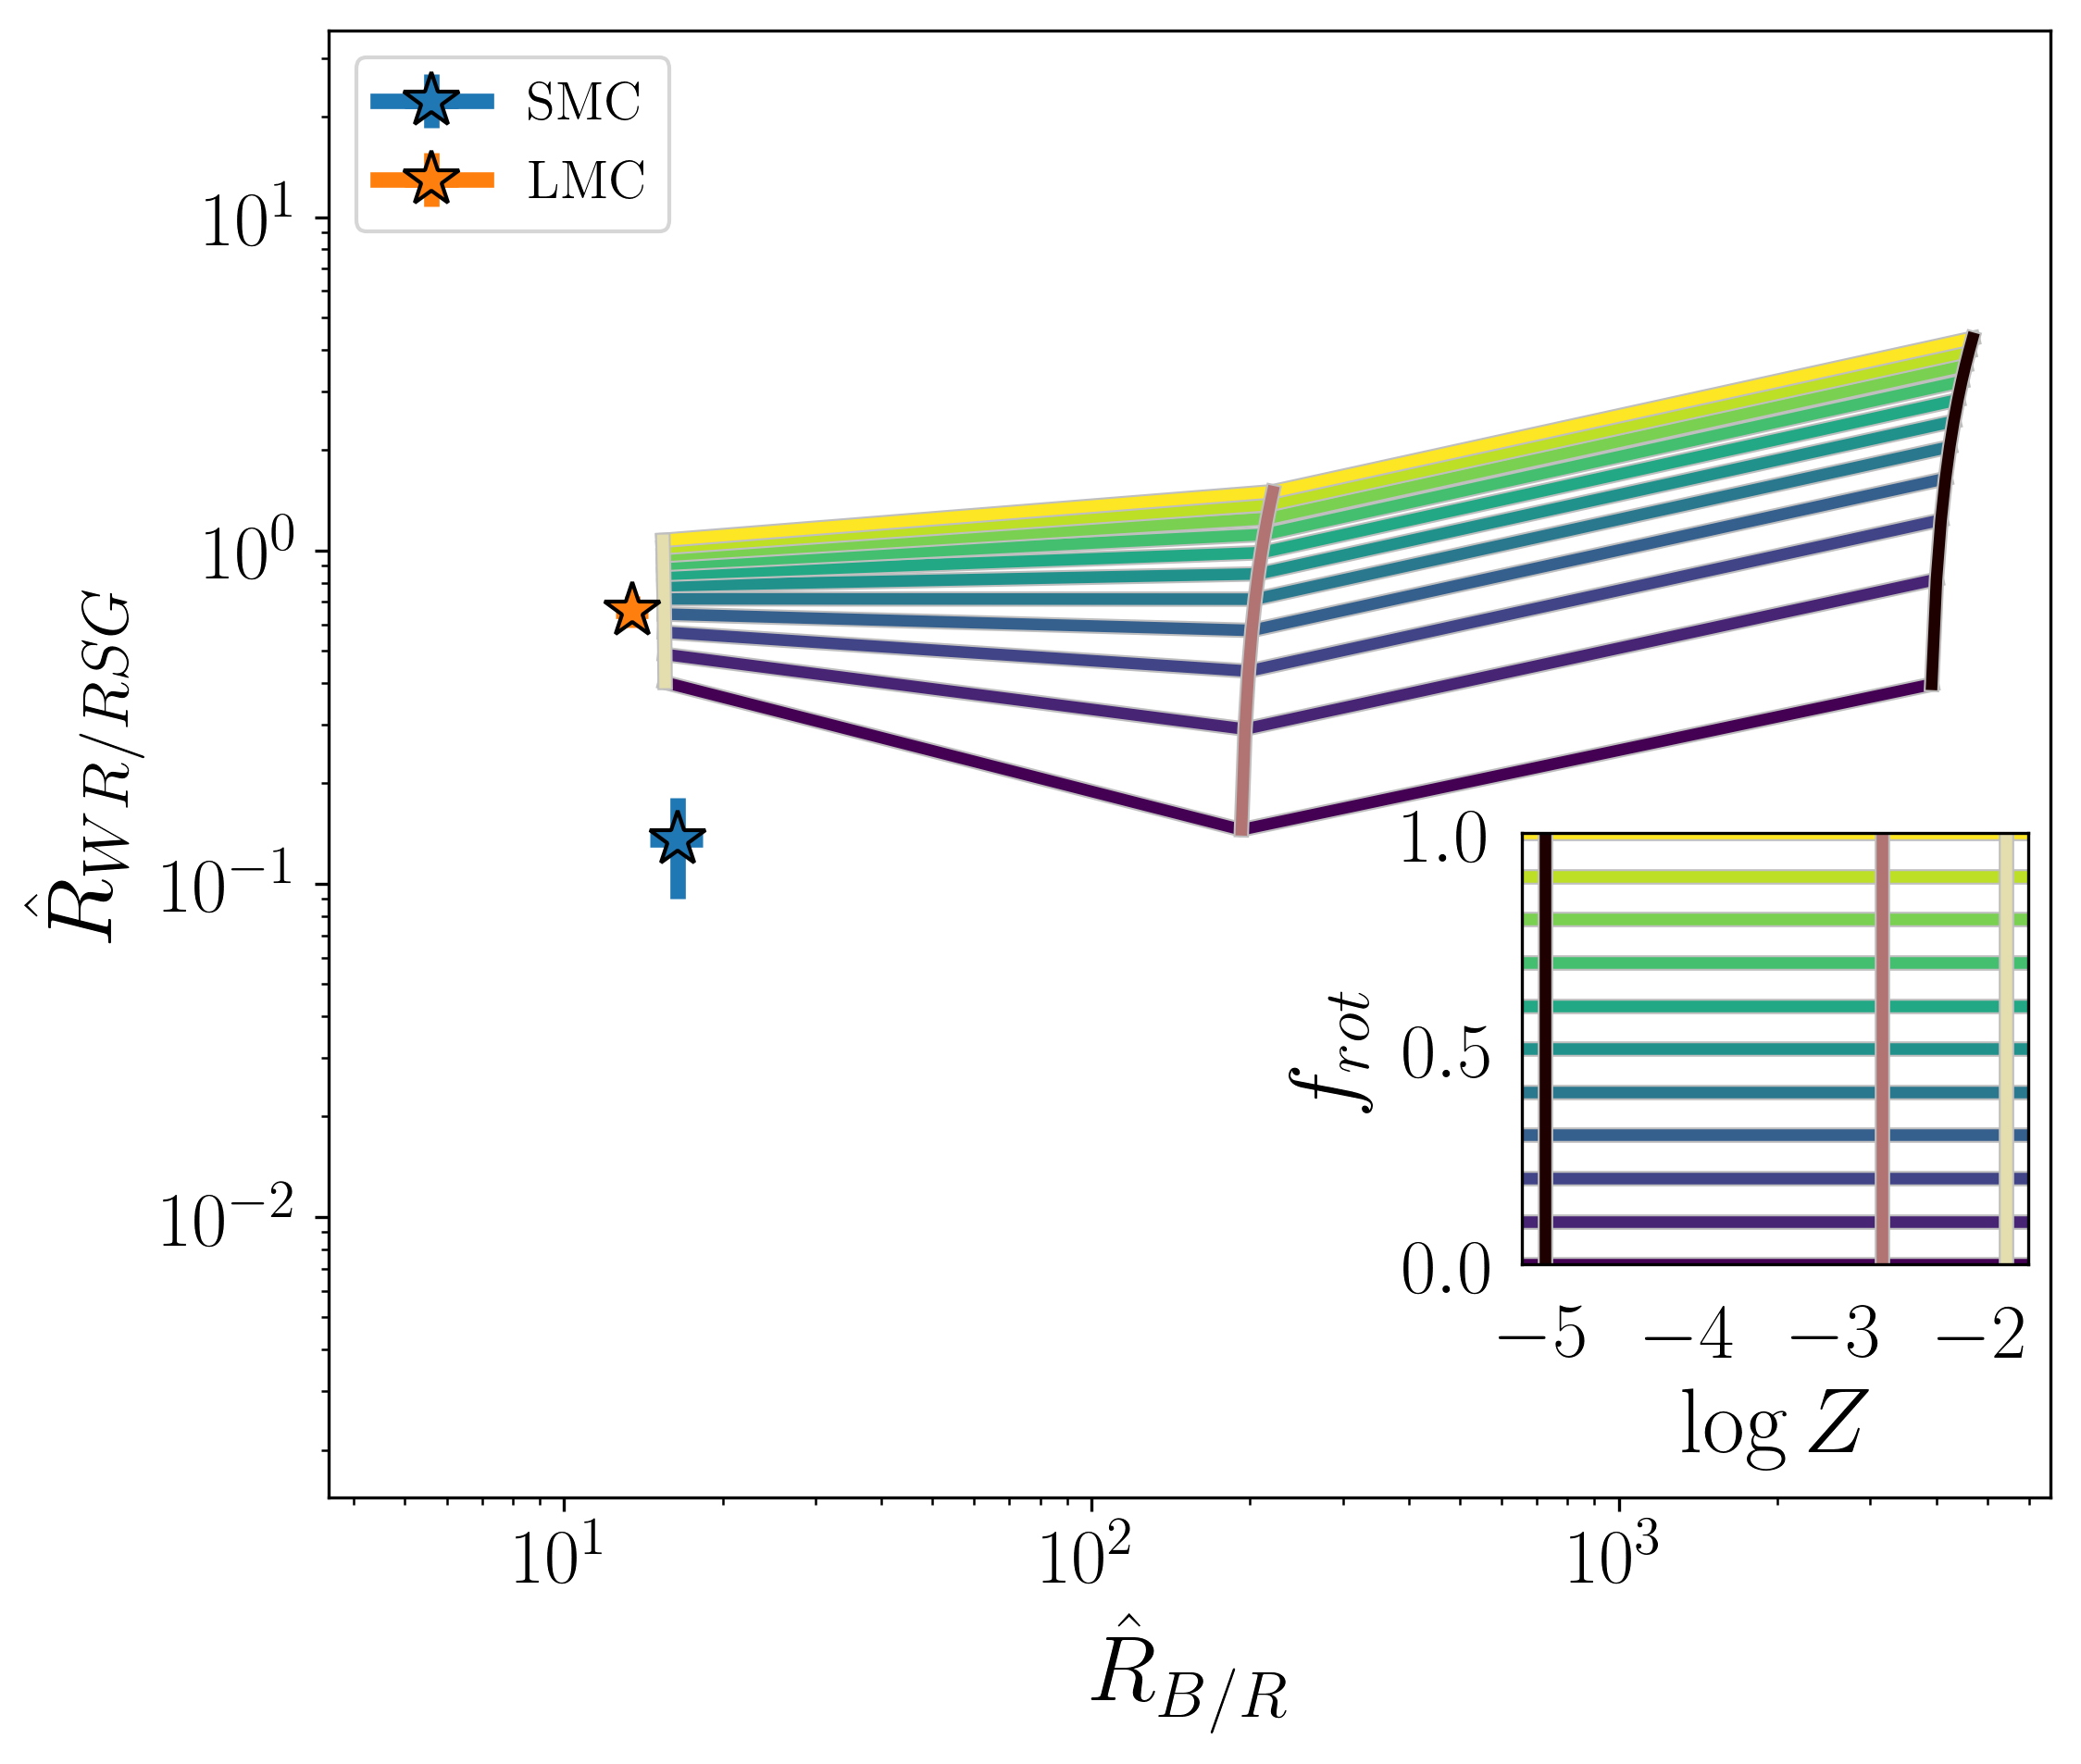

In [19]:
fig, ax = plot_ratios(ratio1='BSG/RSG',ratio2='WR/RSG',par3='logtime',par3val=np.log10(13.7e9),constraint_dict={'Lcuts':(4.9,4.9,4.9,4.9)},models='Geneva',SFH='const')
fig.set_figheight(7)
fig.set_figwidth(8)
fig.dpi = 300

ax[0].errorbar(BR_SMC[0],WRRSG_SMC[0],xerr=[np.array([BR_SMC[1],BR_SMC[2]])],yerr=[np.array([WRRSG_SMC[1],WRRSG_SMC[2]])],marker='*',mec='k',ms=15,label='SMC',zorder=50,lw=4,)
ax[0].errorbar(BR_LMC[0],WRRSG_LMC[0],xerr=[np.array([BR_LMC[1],BR_LMC[2]])],yerr=[np.array([WRRSG_LMC[1],WRRSG_SMC[2]])],marker='*',mec='k',ms=15,label='LMC',zorder=50,lw=4,)
ax[0].legend(loc=2,prop={'size':14})
ax[0].set(title='',xlim=(3.589143949936937, 6599.310536333627),ylim=(0.0014363724588591547, 36.31642578972895))

ax[0].change_geometry(1,1,1)
ax[1].change_geometry(3,3,9)
ax1_pos = ax[1].get_position()
ax[1].set_position([ax1_pos.x0-0.01,ax1_pos.y0+0.12, ax1_pos.width, ax1_pos.height])

ax[1].xaxis.set_tick_params(color='w')
ax[1].yaxis.set_tick_params(color='w')

ax[0].xaxis.label.set_size(24)
ax[0].yaxis.label.set_size(24)
ax[1].xaxis.label.set_size(24)
ax[1].yaxis.label.set_size(24)
ax[1].set_yticks([0,0.5,1])
for tick in ax[0].xaxis.get_major_ticks():
    tick.label.set_fontsize(20)
for tick in ax[0].yaxis.get_major_ticks():
    tick.label.set_fontsize(20)
for tick in ax[1].xaxis.get_major_ticks():
    tick.label.set_fontsize(20)
for tick in ax[1].yaxis.get_major_ticks():
    tick.label.set_fontsize(20)

ax[0].set_xlabel(r'$\hat{R}_{B/R}$')

plt.savefig('MCs_rotation.pdf')

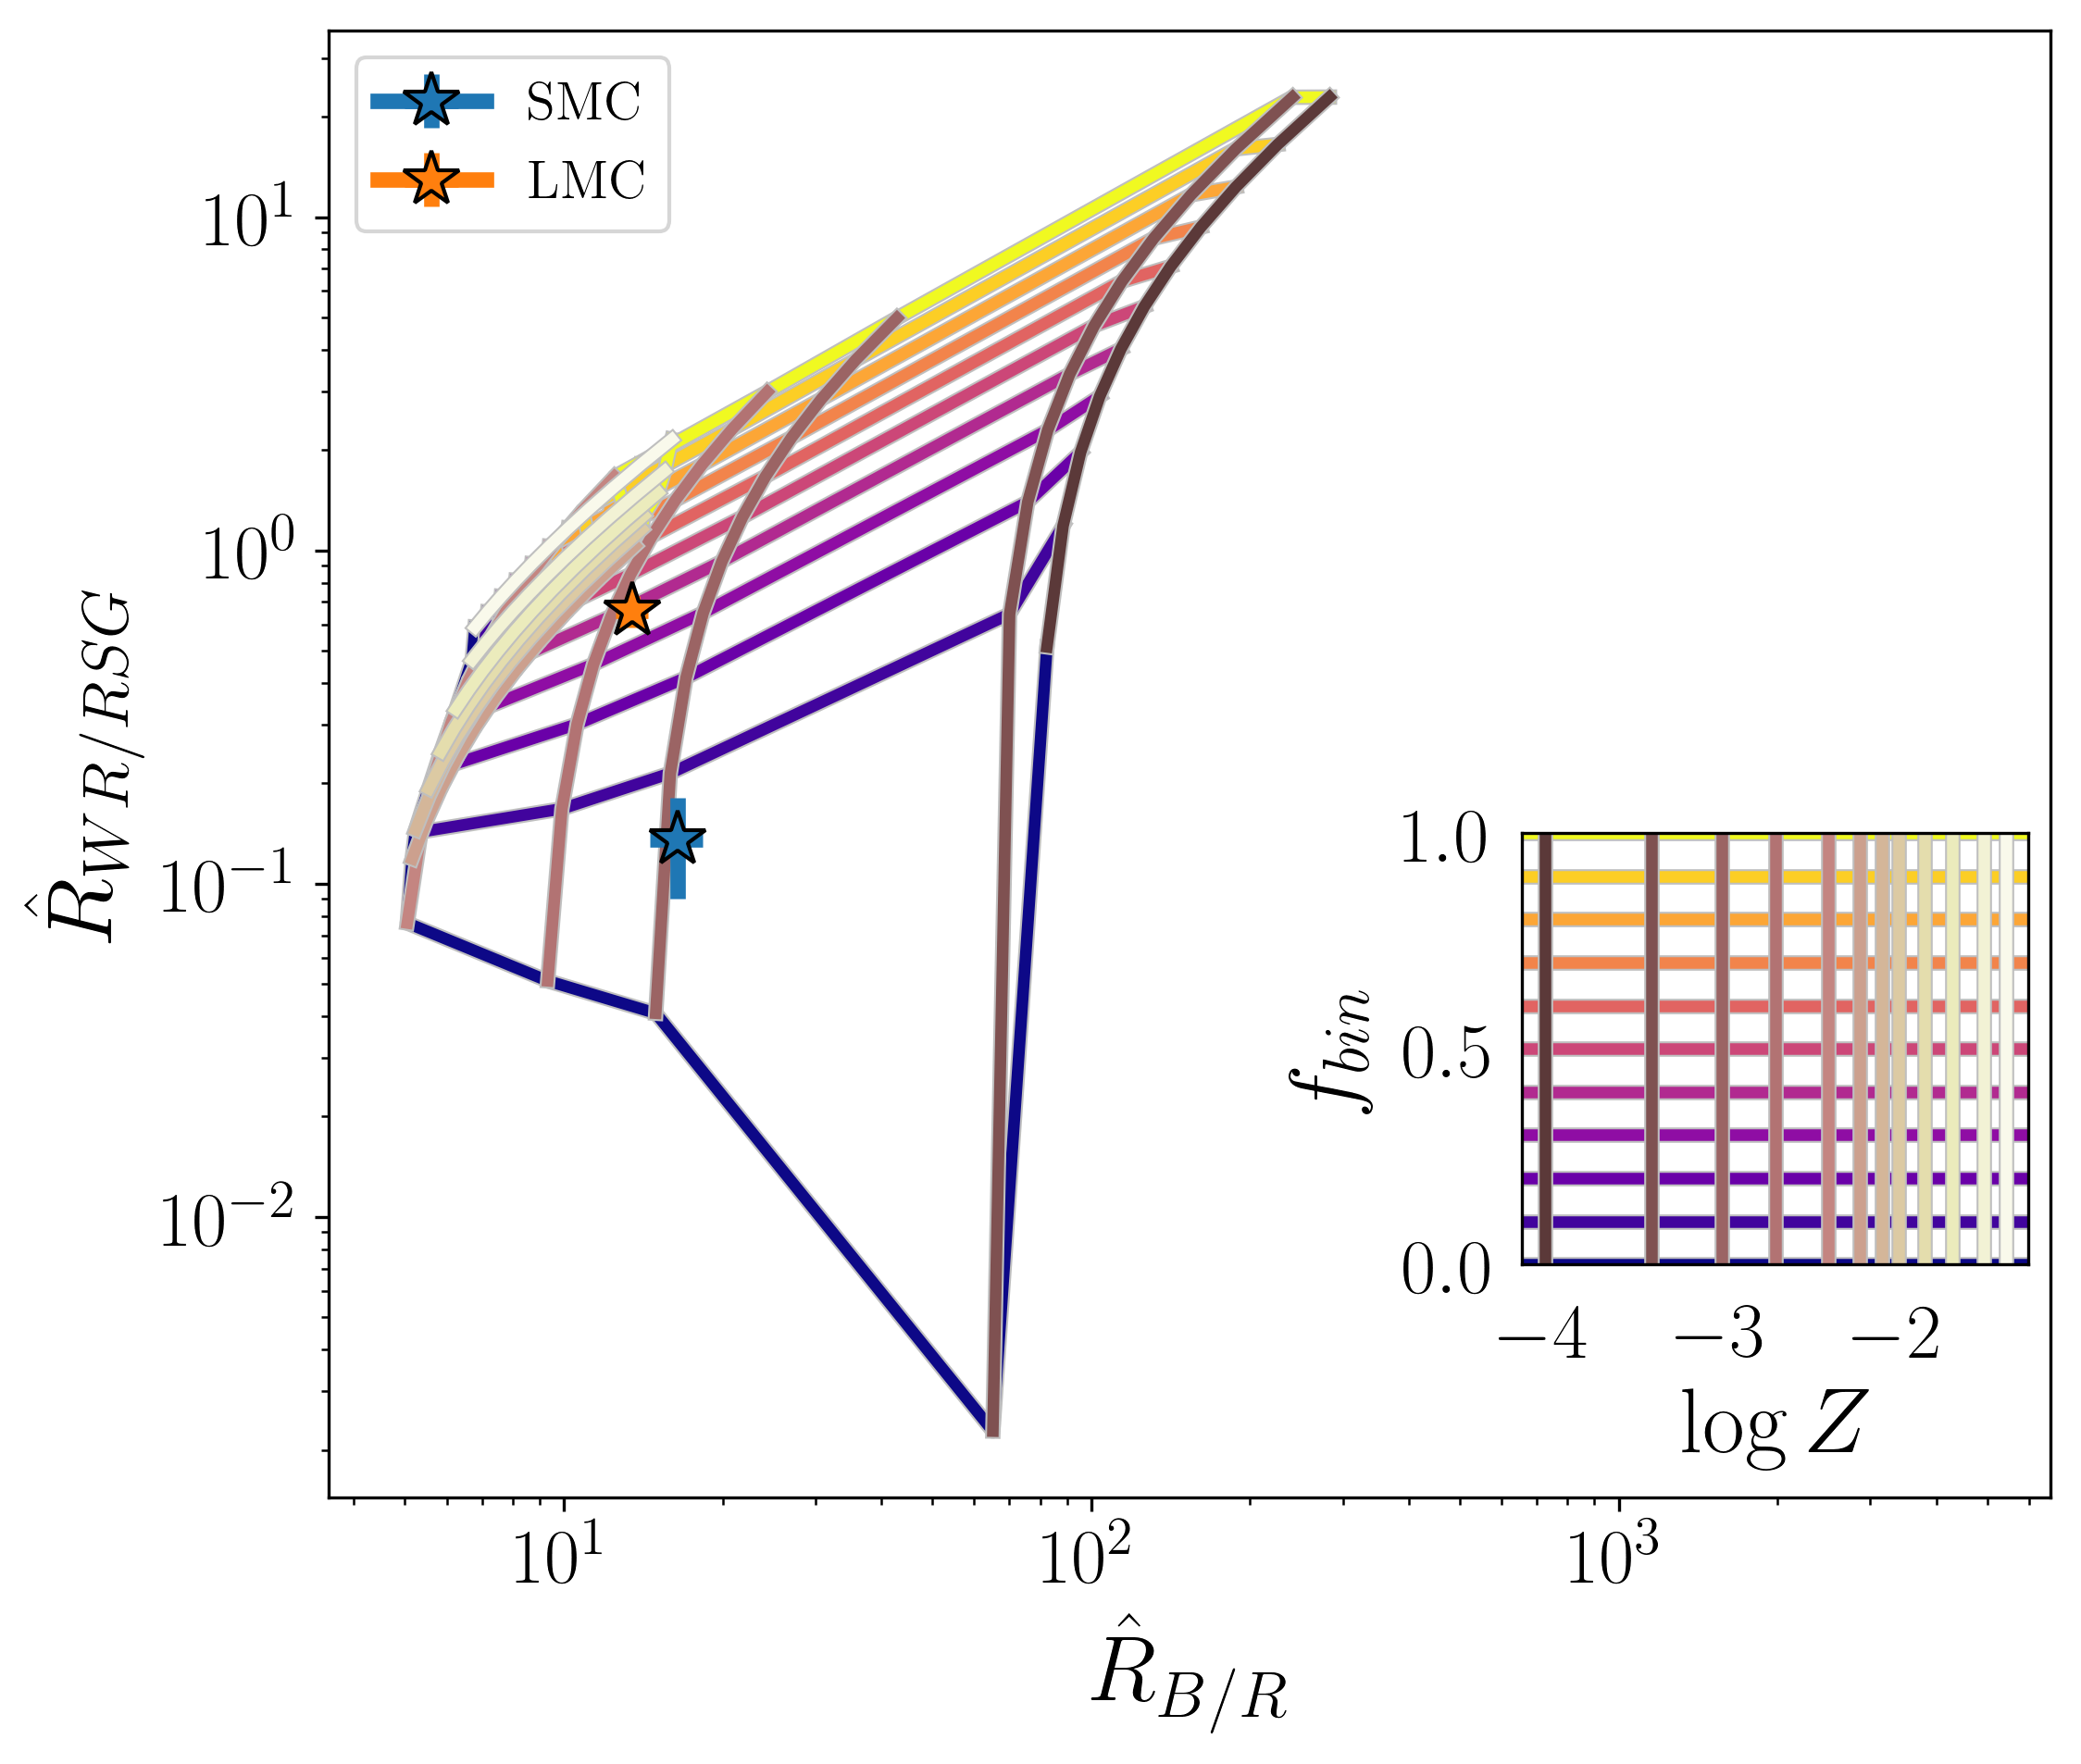

In [20]:
fig, ax = plot_ratios(ratio1='BSG/RSG',ratio2='WR/RSG',par3='logtime',par3val=np.log10(13.7e9),constraint_dict={'Lcuts':(4.9,4.9,4.9,4.9)},SFH='const')
fig.set_figheight(7)
fig.set_figwidth(8)
fig.dpi = 300

ax[0].errorbar(BR_SMC[0],WRRSG_SMC[0],xerr=[np.array([BR_SMC[1],BR_SMC[2]])],yerr=[np.array([WRRSG_SMC[1],WRRSG_SMC[2]])],marker='*',mec='k',ms=15,label='SMC',zorder=50,lw=4,)
ax[0].errorbar(BR_LMC[0],WRRSG_LMC[0],xerr=[np.array([BR_LMC[1],BR_LMC[2]])],yerr=[np.array([WRRSG_LMC[1],WRRSG_SMC[2]])],marker='*',mec='k',ms=15,label='LMC',zorder=50,lw=4,)
ax[0].legend(loc=2,prop={'size':14})
ax[0].set(title='',xlim=(3.589143949936937, 6599.310536333627),ylim=(0.0014363724588591547, 36.31642578972895))

ax[0].change_geometry(1,1,1)
ax[1].change_geometry(3,3,9)
ax1_pos = ax[1].get_position()
ax[1].set_position([ax1_pos.x0-0.01,ax1_pos.y0+0.12, ax1_pos.width, ax1_pos.height])

ax[1].xaxis.set_tick_params(color='w')
ax[1].yaxis.set_tick_params(color='w')

ax[0].xaxis.label.set_size(24)
ax[0].yaxis.label.set_size(24)
ax[1].xaxis.label.set_size(24)
ax[1].yaxis.label.set_size(24)
ax[1].set_yticks([0,0.5,1])
for tick in ax[0].xaxis.get_major_ticks():
    tick.label.set_fontsize(20)
for tick in ax[0].yaxis.get_major_ticks():
    tick.label.set_fontsize(20)
for tick in ax[1].xaxis.get_major_ticks():
    tick.label.set_fontsize(20)
for tick in ax[1].yaxis.get_major_ticks():
    tick.label.set_fontsize(20)

ax[0].set_xlabel(r'$\hat{R}_{B/R}$')

plt.savefig('MCs_binary.pdf')

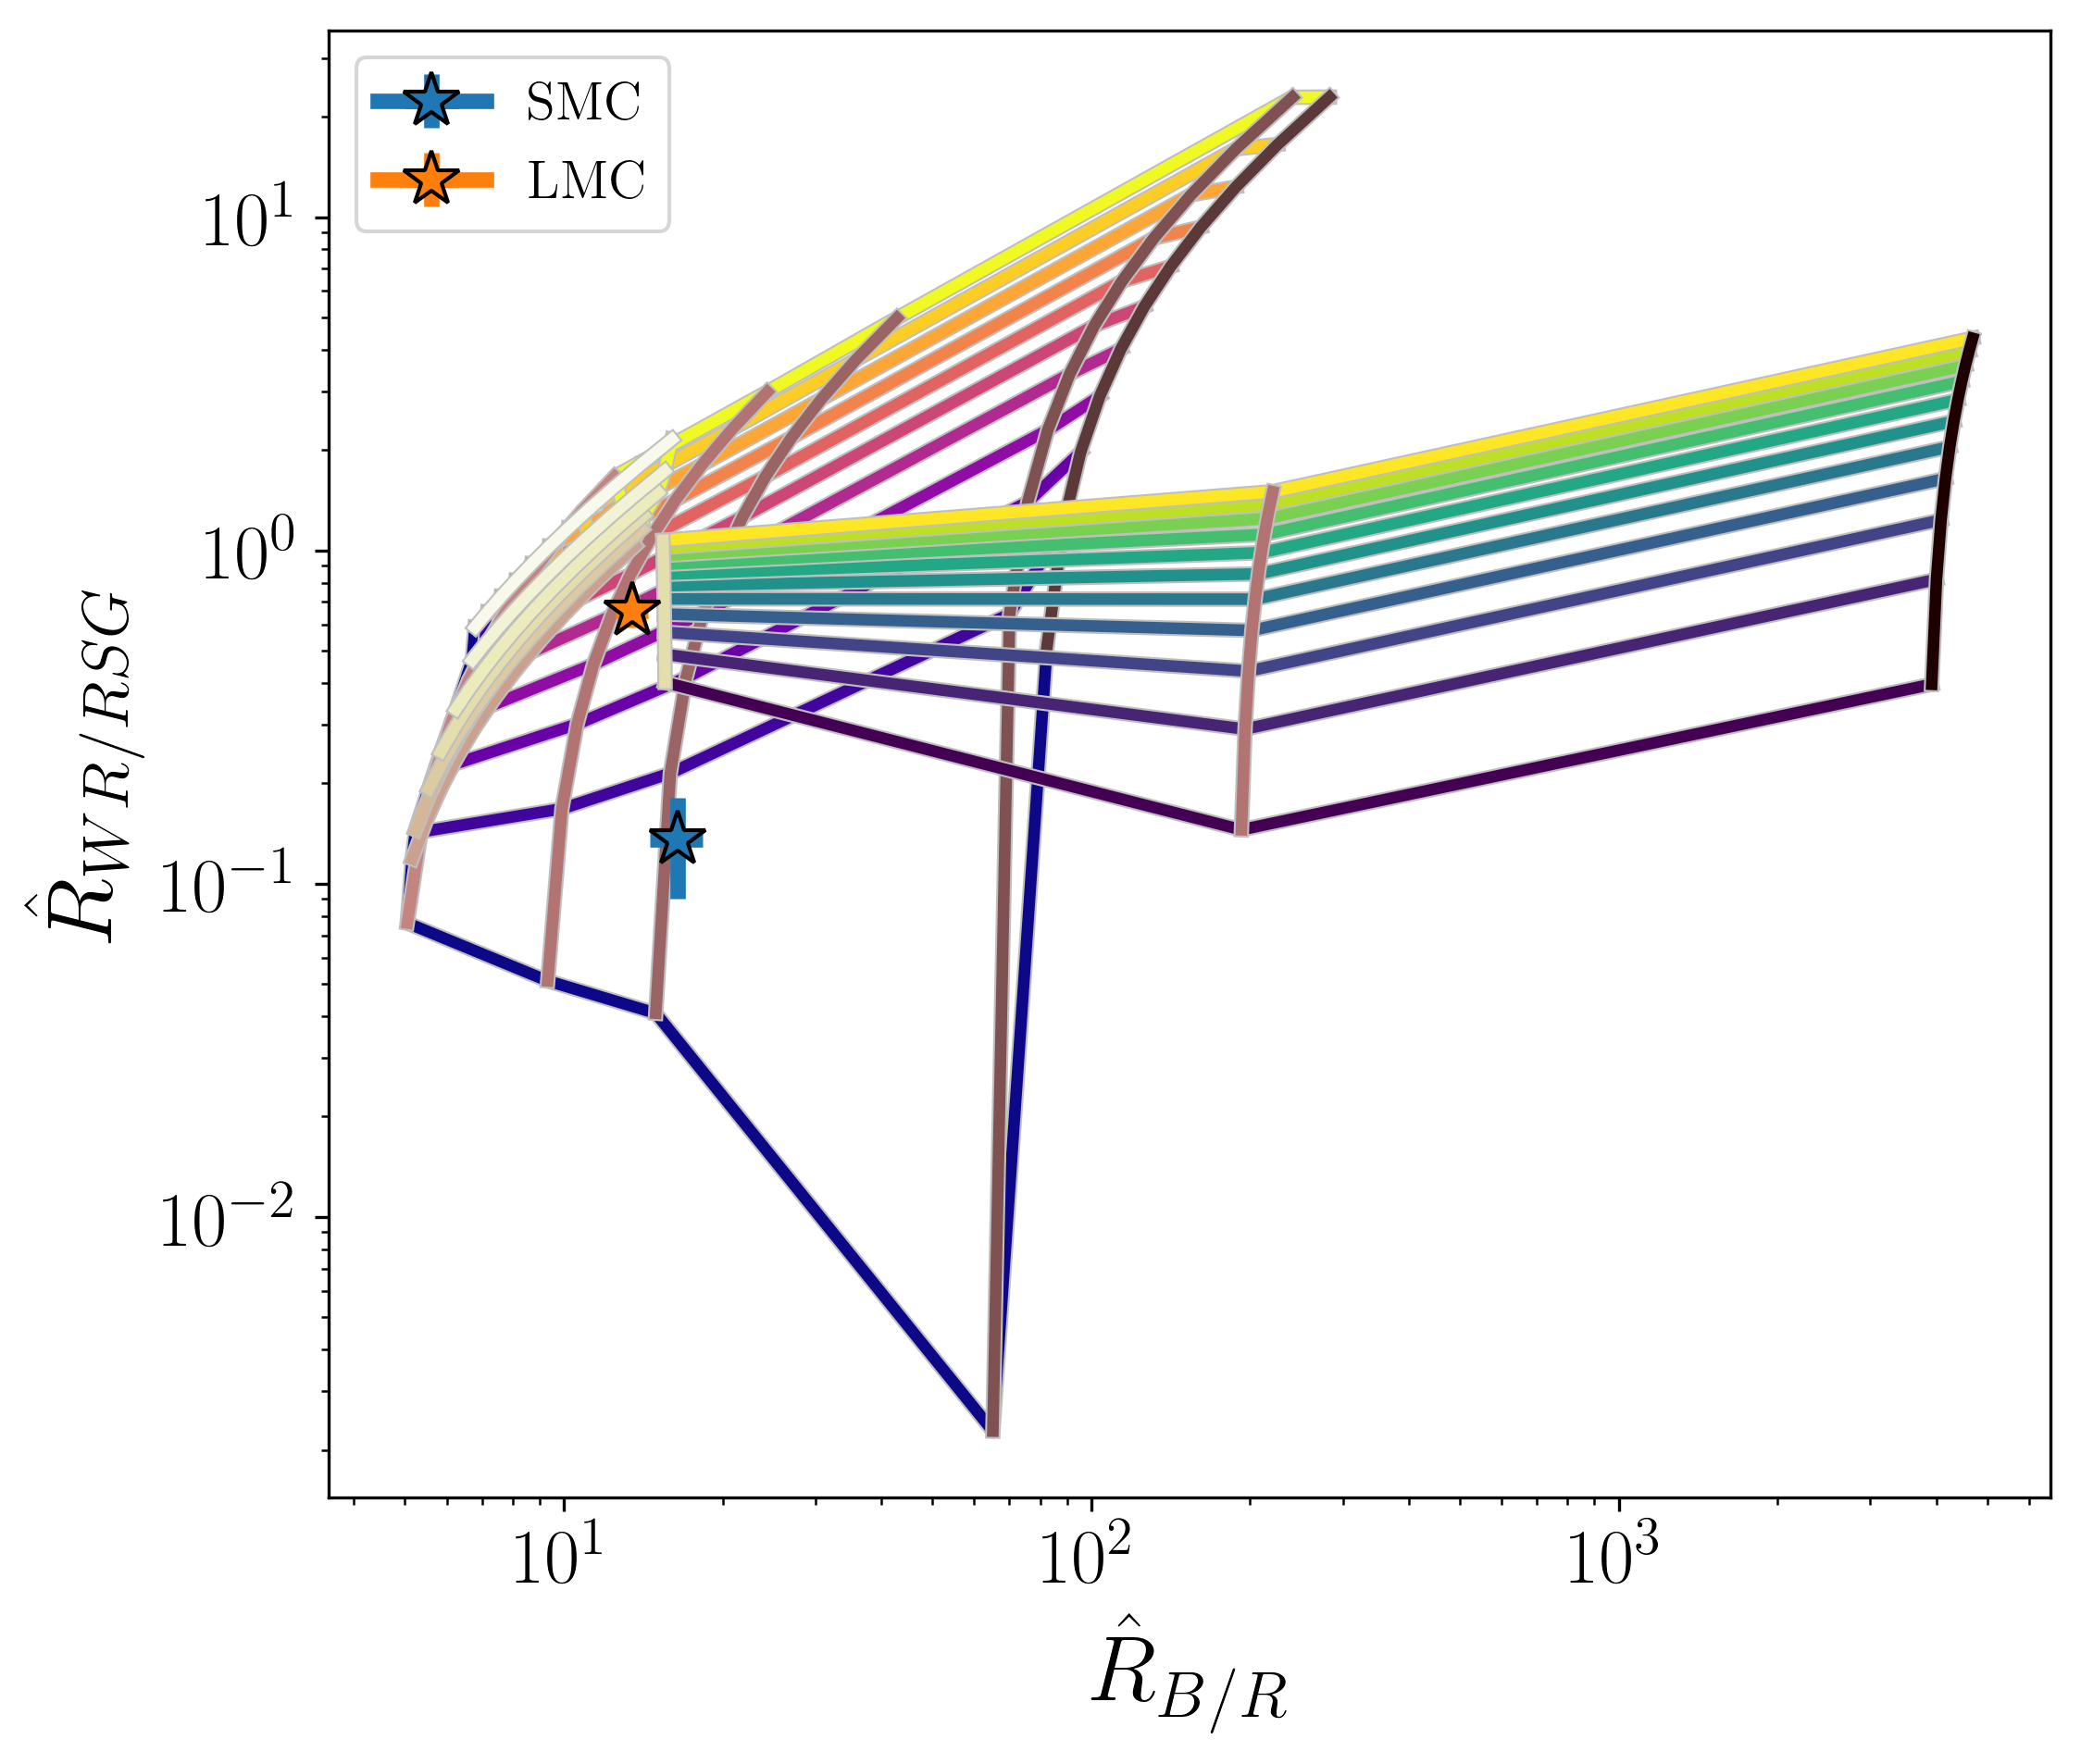

In [21]:
fig, ax = plot_ratios(ratio1='BSG/RSG',ratio2='WR/RSG',par3='logtime',par3val=np.log10(13.7e9),constraint_dict={'Lcuts':(4.9,4.9,4.9,4.9)},SFH='const')
fig, ax = plot_ratios(ratio1='BSG/RSG',ratio2='WR/RSG',par3='logtime',par3val=np.log10(13.7e9),constraint_dict={'Lcuts':(4.9,4.9,4.9,4.9)},models='Geneva',SFH='const',fig=fig)
fig.set_figheight(7)
fig.set_figwidth(8)
fig.dpi = 300
ax[0].change_geometry(1,1,1)
ax[1].remove()

ax[0].errorbar(BR_SMC[0],WRRSG_SMC[0],xerr=[np.array([BR_SMC[1],BR_SMC[2]])],yerr=[np.array([WRRSG_SMC[1],WRRSG_SMC[2]])],marker='*',mec='k',ms=15,label='SMC',zorder=50,lw=4,)
ax[0].errorbar(BR_LMC[0],WRRSG_LMC[0],xerr=[np.array([BR_LMC[1],BR_LMC[2]])],yerr=[np.array([WRRSG_LMC[1],WRRSG_SMC[2]])],marker='*',mec='k',ms=15,label='LMC',zorder=50,lw=4,)
ax[0].legend(loc=2,prop={'size':14})
ax[0].set(title='')

ax[0].change_geometry(1,1,1)

ax[0].xaxis.label.set_size(24)
ax[0].yaxis.label.set_size(24)
for tick in ax[0].xaxis.get_major_ticks():
    tick.label.set_fontsize(20)
for tick in ax[0].yaxis.get_major_ticks():
    tick.label.set_fontsize(20)

ax[0].set_xlabel(r'$\hat{R}_{B/R}$')

plt.savefig('MCs_allmodels.pdf')

In [22]:
for r,lab in zip([[BR_LMC,BR_SMC],[WRRSG_LMC,WRRSG_SMC]],['\hat{R}_{B/R}','\hat{R}_{WR/RSG}']):
    rl = r[0]
    rs = r[1]
    print('${0} = {1:.3f} ^{{+{2:.3f}}}_{{{3:.3f}}}$'.format(lab,rl[0],rl[1],rl[2]))
    print('${0} = {1:.3f} ^{{+{2:.3f}}}_{{{3:.3f}}}$'.format(lab,rs[0],rs[1],rs[2]))

$\hat{R}_{B/R} = 13.510 ^{+0.952}_{0.880}$
$\hat{R}_{B/R} = 16.441 ^{+1.892}_{1.647}$
$\hat{R}_{WR/RSG} = 0.659 ^{+0.072}_{0.065}$
$\hat{R}_{WR/RSG} = 0.136 ^{+0.046}_{0.037}$
